# **US Youtube Trending Data**

---
# *Background*

YouTube is a world notorious online video sharing and social media maintains a list of the top trending videos on the platform.

Youtube Trending is one of their features that helps viewers see what’s happening on YouTube tailored to the region of the audience. Trending aims to surface videos that a wide range of viewers would find interesting. Some trends are predictable, like a new song from a popular artist or a new movie trailer.


Refer to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes).

As a Data Analyst Consulant, this analysis is aimed to determine what factors impact the video algorithm and the predicted amount of interaction so that it may reach the trending list. As a the output of the study, Youtuber Content Creator can gain insight into their technique and strategy for planning the concept of a video.

---
# *Problem Statement*


Therefore, as Data Analysts we try to answer the following problem formulation:

What are the indicators/metrics that can be applied for a YouTube video to become trending? by analysing what factors affect how popular a YouTube video will be
<br><br>
* Are there any correlation between `views`and trending?
* Are there any differences between `likes` and trending?
* Are there any differences between `dislikes` and trending?
* Are there any differences between `comments` and trending?
* Are there any differences between `description` and trending?
* Are there any differences between `tags` and trending?
<br><br>
* What are the top 10 trending video categories?
<br><br>
* What video categories are the most popular for the audience in US?
* What the prime to publish youtube video?





### Trending aims to balance all of these considerations. To achieve this, Trending considers many signals, including (but not limited to):

- View count
- How quickly the video is generating views (i.e. “temperature”)
- Level of engagement
- The age of the video


In [686]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


from matplotlib.ticker import FormatStrFormatter
from wordcloud import WordCloud, STOPWORDS



In [687]:
json_raw = pd.read_json('/Users/ichsanlukita/Documents/Purwadhika - Data Science/Python/Capstone project - Module 2/Trending Youtube Video Statistics/US_category_id.json')
json_raw

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [688]:
# Open JSON file

with open('/Users/ichsanlukita/Documents/Purwadhika - Data Science/Python/Capstone project - Module 2/Trending Youtube Video Statistics/US_category_id.json') as file:
    data = json.load(file)


In [689]:
# JSON file library content
data

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [690]:
# Breakdown JSON list of dictionary

df_json = pd.json_normalize(data, record_path =['items'])
df_json


,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [691]:
# Indetify row of dataframe length within df_nested_list

len(df_json)

32

In [692]:
# Open CSV file

df_csv = pd.read_csv('/Users/ichsanlukita/Documents/Purwadhika - Data Science/Python/Capstone project - Module 2/Trending Youtube Video Statistics/USvideos.csv', skipinitialspace=True)
df_csv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [693]:
# Indetify row of dataframe length within df_csv

len(df_csv)

40949

---

** Data **

-----

## 1. Data Cleaning ##

---

a. CSV cleaning

In [694]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [695]:
# Finding Null or Not Applicable data

df_csv.isnull().sum()

# 570 coloumns in 'description' found as NULL or NA

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [696]:
df_csv[df_csv['description'].isna()]

# Since 'description' columns is not mandatory in youtube, then it remains blank for the sake of analysis.
# The discovery data of description lead to another findings that 'tags' coloumns has '[none]' value string  assign as NaN value

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,1h7KV2sjUWY,18.10.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1021063,58806,376,3903,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40325,1h7KV2sjUWY,18.11.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1024052,58862,377,3904,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40538,1h7KV2sjUWY,18.12.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1029290,58980,377,3931,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40739,1h7KV2sjUWY,18.13.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1034480,59090,379,3927,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN


In [697]:
# Checking the '[none]' string
df_csv[df_csv['tags']=='[none]']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
97,xfmipNU4Odc,17.14.11,Edna's registered owner thought she was dead f...,Hope For Paws - Official Rescue Channel,15,2017-11-10T18:02:04.000Z,[none],284666,16396,81,949,https://i.ytimg.com/vi/xfmipNU4Odc/default.jpg,False,False,False,Please donate $5 and help us save more lives:\...
133,X7flefV8tec,17.14.11,"President Bill Clinton On Dictators, Democracy...",Team Coco,24,2017-11-09T02:37:49.000Z,[none],366180,4364,4448,1997,https://i.ytimg.com/vi/X7flefV8tec/default.jpg,False,False,False,#ConanNYC Highlight: President Clinton talks a...
136,5x1FAiIq_pQ,17.14.11,Alicia Keys - When You Were Gone,Alicia Keys,10,2017-11-09T15:49:21.000Z,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,Find out more in The Vault: http://bit.ly/AK_A...
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40822,VGykknw9eCM,18.14.06,"Made Defiant: The Mixtape ft. Neymar Jr., Kane...",Beats by Dre,10,2018-06-07T07:01:06.000Z,[none],3577614,12318,1345,1414,https://i.ytimg.com/vi/VGykknw9eCM/default.jpg,False,False,False,"When your time comes, you have two choices. Yo..."
40826,fAIX12F6958,18.14.06,Bumblebee (2018) - Official Teaser Trailer - P...,Paramount Pictures,1,2018-06-05T07:00:01.000Z,[none],19864779,228670,16420,46318,https://i.ytimg.com/vi/fAIX12F6958/default.jpg,False,False,False,Every adventure has a beginning. Watch the off...
40872,gS1DbvHHVH0,18.14.06,Going in to brain surgery,Simone Giertz,28,2018-05-30T14:22:13.000Z,[none],1635301,120791,1098,20711,https://i.ytimg.com/vi/gS1DbvHHVH0/default.jpg,False,False,False,We’ll post an update on Instagram and Twitter ...
40880,E4c7EE8_IX0,18.14.06,Weezer - Africa,weezer,10,2018-05-29T12:00:11.000Z,[none],4682557,115240,5069,9170,https://i.ytimg.com/vi/E4c7EE8_IX0/default.jpg,False,False,False,Stream + download the song: http://fanlink.to/...


In [698]:
df_csv['tags'] = df_csv['tags'].replace(to_replace='[none]', value=np.nan)

In [699]:
# Cek kembali, apakah kolom tags masih memiliki value '[none]'
df_csv[df_csv['tags']=='[none]'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


In [700]:
# Check if there is video that identified as True = has been removed / error

df_csv['video_error_or_removed'].unique()

array([False,  True])

***Drop video identified as Removed OR Error**

In [701]:
# Check how many video that has been identified as removed or error

len(df_csv[df_csv['video_error_or_removed']==True])

23

In [702]:
# Find index of Video that identified as removed or error
index_vidremoved = df_csv[df_csv['video_error_or_removed']==True].index
index_vidremoved


Int64Index([ 2203, 15499, 15755, 15980, 30354, 30571, 30785, 30997, 31212,
            31429, 31635, 31855, 32068, 32284, 32498, 32706, 32758, 32971,
            33187, 33414, 33620, 33837, 34594],
           dtype='int64')

In [703]:
# Drop data of video identified as removed or error
df_csv.drop(index_vidremoved, inplace=True)

In [704]:
# Check if the data identified as removed or error has been succesfully deleted from dataframe
len(df_csv[df_csv['video_error_or_removed']==True])

0

In [705]:
len(df_csv)

40926

b. JSON cleaning

In [706]:
df_json.isnull().sum()

kind                  0
etag                  0
id                    0
snippet.channelId     0
snippet.title         0
snippet.assignable    0
dtype: int64

In [707]:
df_json

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [708]:
# Rename the name of coloumn
dict = {'id':'category_id',
        'snippet.channelId':'channel_id',
        'snippet.title':'category',	
        'snippet.assignable':'assignable'}
 
# call rename () method
df_json.rename(columns=dict,
          inplace=True)

df_json

,kind,etag,category_id,channel_id,category,assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [709]:
# Looping 'category_id' get the value of each rows
list_id = []

for index, row in df_json.iterrows():
    list_id.append(row['category_id'])

print(list_id)



['1', '2', '10', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']


In [710]:
# Looping 'category' get the value of each rows
list_category = []

for index, row in df_json.iterrows():
    list_category.append(row['category'])

print(list_category)



['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


In [711]:
len(list_id)

32

In [712]:
len(list_category)

32

In [713]:
# Create DataFrame contains 'category_id' and 'category'

# Create pandas Series
cat_id = pd.Series(list_id)
cat_name = pd.Series(list_category)

# Combine two series become new DataFrame
df_catvid = pd.DataFrame({'category_id':cat_id, 'category':cat_name})
df_catvid


,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [714]:
# Check data type
df_catvid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     object
 1   category     32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


In [715]:
# Check data type
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40926 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40926 non-null  object
 1   trending_date           40926 non-null  object
 2   title                   40926 non-null  object
 3   channel_title           40926 non-null  object
 4   category_id             40926 non-null  int64 
 5   publish_time            40926 non-null  object
 6   tags                    39405 non-null  object
 7   views                   40926 non-null  int64 
 8   likes                   40926 non-null  int64 
 9   dislikes                40926 non-null  int64 
 10  comment_count           40926 non-null  int64 
 11  thumbnail_link          40926 non-null  object
 12  comments_disabled       40926 non-null  bool  
 13  ratings_disabled        40926 non-null  bool  
 14  video_error_or_removed  40926 non-null  bool  
 15  de

In [716]:
# Covert data type of category_id as int64 to match the for combining 2 tables
df_catvid['category_id'] = df_catvid['category_id'].astype(np.int64)

df_catvid

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Combining data from df_catvid (JSON) with df_csv (CSV)

In [717]:
# Transform data JSON to CSV, to make the data format uniform
df_catvid.to_csv('/Users/ichsanlukita/Documents/Purwadhika - Data Science/Python/Capstone project - Module 2/video_category.csv', index=False)

In [718]:
df = pd.merge(df_csv, df_catvid, how='inner', left_on='category_id', right_on='category_id')
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40921,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40922,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40923,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40924,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows


## Data Identification

Based on existing in USvideos.csv we have 16 columns with these following information:

* `video_id` : unique ID for each video.
* `trending_date`: daily date record of the YouTube videos.
* `title` : the title of the video.
* `channel_title` : name of the channel.
* `category_id` : unique ID for each video category. (further join with JSON file)
* `publish_time` : publishing video date.
* `tags` : video tags.
* `views` : videos view count.
* `likes` : videos like count.
* `dislikes` : videos dislike count.
* `comment_count` : videos comment count.
* `thumbnail_link` : videos thumbnail link.
* `comments_disabled` : contains of boolean of whether the comment section is disabled.
* `ratings_disabled` : contains of boolean of whether the rating video is disabled.
* `video_error_or_removed` : contains of boolean of whether the video from that channel has been removed.
* `description` : description box of the videos.



### ***For the sake of analysis, coloumn 'description' AND 'tags' with NaN value are intentionally remain as it is.***

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40926 entries, 0 to 40925
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40926 non-null  object
 1   trending_date           40926 non-null  object
 2   title                   40926 non-null  object
 3   channel_title           40926 non-null  object
 4   category_id             40926 non-null  int64 
 5   publish_time            40926 non-null  object
 6   tags                    39405 non-null  object
 7   views                   40926 non-null  int64 
 8   likes                   40926 non-null  int64 
 9   dislikes                40926 non-null  int64 
 10  comment_count           40926 non-null  int64 
 11  thumbnail_link          40926 non-null  object
 12  comments_disabled       40926 non-null  bool  
 13  ratings_disabled        40926 non-null  bool  
 14  video_error_or_removed  40926 non-null  bool  
 15  de

In [720]:
df[df.duplicated()==True]['title']

2864                              $17 Pet vs. $100,000 Pet
2865               Wearing Fashion Nova Outfits For A Week
11577    YoungBoy Never Broke Again Goes Sneaker Shoppi...
11578           WE MADE OUR MOM CRY...HER DREAM CAME TRUE!
11579    Terry Crews Answers the Web's Most Searched Qu...
11580     Sarah Paulson Gets Scared During '5 Second Rule'
11581    Gabby Barrett Sings I Have Nothing by Whitney ...
11582            DIY GIANT McDONALDS HASH BROWN 🍟 - VERSUS
11583    24 HOUR BOX FORT PRISON ESCAPE ROOM!! 📦🚔 Diggi...
11584        Exciting iPhone 11 Leaks & Round Apple Watch!
11585    DO PARENTS KNOW MODERN MUSIC? #17 (REACT: Do T...
11586                              Mother Knows Best - SNL
11588    MANIFEST | Official Trailer | NBC Fall Shows 2018
11589         10 Most DEVASTATING Cyber Attacks in History
11590    We built the Infinity Gauntlet with 25,000 mag...
11591           FORTNITE The Movie (Official Fake Trailer)
11592    ‘A Change Is Gonna Come’ for Lifford after he .

In [721]:
df[df['title']=='$17 Pet vs. $100,000 Pet']

# Based on this findings, we can conclude that a video could be show up as trendig for couple days, week, or even more

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
2839,jzLlsbdrwQk,18.14.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",1659538,41402,3781,5216,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2853,jzLlsbdrwQk,18.15.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3081033,60379,6857,7796,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2864,jzLlsbdrwQk,18.15.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3081033,60379,6857,7796,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2866,jzLlsbdrwQk,18.16.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3669938,70190,8078,8935,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2880,jzLlsbdrwQk,18.17.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",4144816,78241,9032,9660,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2894,jzLlsbdrwQk,18.18.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",4475322,83846,9655,10404,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2907,jzLlsbdrwQk,18.19.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",4720603,87647,10084,10820,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2920,jzLlsbdrwQk,18.20.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",4932158,90726,10482,11140,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2937,jzLlsbdrwQk,18.21.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",5176435,93643,10827,11351,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
2950,jzLlsbdrwQk,18.22.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",5329282,95408,11061,11504,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs


In [722]:
df.info()

# Identify the data format and patterm
# Based on the findings, 'publish_time' an 'trending_time' value is NOT indicated as date / time series datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40926 entries, 0 to 40925
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40926 non-null  object
 1   trending_date           40926 non-null  object
 2   title                   40926 non-null  object
 3   channel_title           40926 non-null  object
 4   category_id             40926 non-null  int64 
 5   publish_time            40926 non-null  object
 6   tags                    39405 non-null  object
 7   views                   40926 non-null  int64 
 8   likes                   40926 non-null  int64 
 9   dislikes                40926 non-null  int64 
 10  comment_count           40926 non-null  int64 
 11  thumbnail_link          40926 non-null  object
 12  comments_disabled       40926 non-null  bool  
 13  ratings_disabled        40926 non-null  bool  
 14  video_error_or_removed  40926 non-null  bool  
 15  de

In [723]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


- Based on the assumptions in the data above, there is a possibility that videos can become trending in a few days, weeks, months, or more.

- There, we need to find the time span for each video, how long it lasts to be trending.

- By measuring the distance between the publish time and the trending time

In [724]:
# Binning view number to define view category using For Loop

df['view_category'] = df['views']

for i in range(len(df)):
    if df['views'].iloc[i] <= 9999:
        df['view_category'].iloc[i]= '<10K'
    elif df['views'].iloc[i] <= 49999:
        df['view_category'].iloc[i]= '10K-40K'
    elif df['views'].iloc[i] <= 99999:
        df['view_category'].iloc[i]= '50K-90K'
    elif df['views'].iloc[i] <= 499999:
        df['view_category'].iloc[i]= '100K-400K'
    elif df['views'].iloc[i] <= 999999:
        df['view_category'].iloc[i]= '500K-900K'
    elif df['views'].iloc[i] <= 4999999:
        df['view_category'].iloc[i]= '1M-4M'
    elif df['views'].iloc[i] <= 9999999:
        df['view_category'].iloc[i]= '5M-9M'
    elif df['views'].iloc[i] <= 49999999:
        df['view_category'].iloc[i]= '10M-40M'
    elif df['views'].iloc[i] <= 99999999:
        df['view_category'].iloc[i]= '50M-90M'
    elif df['views'].iloc[i] <= 199999999:
        df['view_category'].iloc[i]= '100M'
    elif df['views'].iloc[i] >= 200000000:
        df['view_category'].iloc[i]= '200M'


In [725]:
# Check column 'views_category'
df['view_category'].unique()

array(['500K-900K', '50K-90K', '100K-400K', '1M-4M', '<10K', '10K-40K',
       '5M-9M', '10M-40M', '50M-90M', '100M', '200M'], dtype=object)

In [726]:
# check views binning From 100000 To 499999

df['views'].between(100000, 499999).value_counts()

False    29090
True     11836
Name: views, dtype: int64

In [727]:
# check views binning string label From 100000 To 499999 as 100-400K

len(df[df['view_category']=='100K-400K'])


11836

In [728]:
# check views binning From 200000000 and >200000000

df['views'].between(200000000, df[['views']].describe().loc['max'][0]).value_counts()

False    40920
True         6
Name: views, dtype: int64

In [729]:
# check views binning string label From 200000000 and >200000000

len(df[df['view_category']=='200M'])

6

In [730]:
df[df['view_category']=='200M']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category
31662,VYOjWnS4cMY,18.28.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",200820941,4714942,316129,491005,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,200M
31702,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,200M
31747,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,200M
31790,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,200M
31833,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,200M
31879,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,200M


***Trending Frequency***
Creat new column with the value of trending count per video

In [731]:
# Count the number of video appears as trend

trending_count = df.groupby(['title']).count()[['trending_date']]
trending_count.columns = ['trending_count']


In [732]:
# Merging count result of video trending frequency per each title

df= pd.merge(df, trending_count, how='inner', left_on='title', right_on='title')
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500K-900K,7
1,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7
2,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7


In [733]:
## Check if the frequency of trending match with every title

df[df['title']=='#23 Feed The Homeless | One List, One Life']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count
303,4qakFfGRV4E,17.01.12,"#23 Feed The Homeless | One List, One Life","One List , One Life",22,2017-11-30T15:36:12.000Z,"homeless|""experiment""|""people""|""man""|""singing""...",32385,568,77,97,https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg,False,False,False,Learn more about us: https://mybestfriendslist...,People & Blogs,10K-40K,6
304,4qakFfGRV4E,17.02.12,"#23 Feed The Homeless | One List, One Life","One List , One Life",22,2017-11-30T15:36:12.000Z,"homeless|""experiment""|""people""|""man""|""singing""...",40644,667,85,106,https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg,False,False,False,Learn more about us: https://mybestfriendslist...,People & Blogs,10K-40K,6
305,4qakFfGRV4E,17.03.12,"#23 Feed The Homeless | One List, One Life","One List , One Life",22,2017-11-30T15:36:12.000Z,"homeless|""experiment""|""people""|""man""|""singing""...",41274,683,85,110,https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg,False,False,False,Learn more about us: https://mybestfriendslist...,People & Blogs,10K-40K,6
306,4qakFfGRV4E,17.04.12,"#23 Feed The Homeless | One List, One Life","One List , One Life",22,2017-11-30T15:36:12.000Z,"homeless|""experiment""|""people""|""man""|""singing""...",41742,707,86,112,https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg,False,False,False,Learn more about us: https://mybestfriendslist...,People & Blogs,10K-40K,6
307,4qakFfGRV4E,17.05.12,"#23 Feed The Homeless | One List, One Life","One List , One Life",22,2017-11-30T15:36:12.000Z,"homeless|""experiment""|""people""|""man""|""singing""...",42463,732,87,121,https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg,False,False,False,Learn more about us: https://mybestfriendslist...,People & Blogs,10K-40K,6
308,4qakFfGRV4E,17.06.12,"#23 Feed The Homeless | One List, One Life","One List , One Life",22,2017-11-30T15:36:12.000Z,"homeless|""experiment""|""people""|""man""|""singing""...",43012,754,87,123,https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg,False,False,False,Learn more about us: https://mybestfriendslist...,People & Blogs,10K-40K,6


## Publish Detail Info

### Publish Date

In [734]:
# Extract Publish Date
df['publish_date'] = df['publish_time'].str.extract('(\d+-\d+-\d+)')
df['publish_date']

0        2017-11-13
1        2017-11-13
2        2017-11-13
3        2017-11-13
4        2017-11-13
            ...    
40921    2018-05-10
40922    2018-05-10
40923    2018-05-10
40924    2018-05-10
40925    2018-05-10
Name: publish_date, Length: 40926, dtype: object

In [735]:
# Convert 'publish_time' from string to datetime64[ns] data type
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['publish_date']

0       2017-11-13
1       2017-11-13
2       2017-11-13
3       2017-11-13
4       2017-11-13
           ...    
40921   2018-05-10
40922   2018-05-10
40923   2018-05-10
40924   2018-05-10
40925   2018-05-10
Name: publish_date, Length: 40926, dtype: datetime64[ns]

In [736]:
# Extract Publish hour
df['publish_hour'] = df['publish_time'].str.extract('(\d+:\d+:\d+)')
df['publish_hour']

0        17:13:01
1        17:13:01
2        17:13:01
3        17:13:01
4        17:13:01
           ...   
40921    21:01:22
40922    21:01:22
40923    21:01:22
40924    21:01:22
40925    21:01:22
Name: publish_hour, Length: 40926, dtype: object

In [737]:
# Convert 'publish_hour' data type into datetime64[ns] data type
df['publish_hour'] = pd.to_datetime(df['publish_hour'], format='%H:%M:%S').dt.time

In [738]:
# Extracting hour in oder to get the numerical data (integer), later will be used for further analysis
df['publish_hour_hr'] = df['publish_time'].str.extract('(\d+):').astype(int)

In [739]:
# Extracting minute in oder to get the numerical data (integer), later will be used for further analysis

df['publish_hour_min'] = df['publish_time'].str.extract(':(\d+):').astype(int)
df['publish_hour_min'].unique()

array([13, 47,  0,  8, 19, 30, 24, 27, 16, 54, 33,  1,  3, 57, 25, 46, 23,
       26, 44, 12, 56, 29,  5, 34,  2,  4, 18, 39, 59, 15, 14, 42, 55, 22,
       50, 49,  7, 36,  9, 11, 37, 53, 10, 31, 20, 40, 51, 28, 52, 45, 48,
       35, 41, 17, 58, 21, 38, 32,  6, 43])

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40926 entries, 0 to 40925
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40926 non-null  object        
 1   trending_date           40926 non-null  object        
 2   title                   40926 non-null  object        
 3   channel_title           40926 non-null  object        
 4   category_id             40926 non-null  int64         
 5   publish_time            40926 non-null  object        
 6   tags                    39405 non-null  object        
 7   views                   40926 non-null  int64         
 8   likes                   40926 non-null  int64         
 9   dislikes                40926 non-null  int64         
 10  comment_count           40926 non-null  int64         
 11  thumbnail_link          40926 non-null  object        
 12  comments_disabled       40926 non-null  bool  

## Trending Detail Info

In [741]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500K-900K,7,2017-11-13,17:13:01,17,13
1,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13
2,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13
3,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13
4,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13


In [742]:
df['trending_date'].sort_values()

26761    17.01.12
21634    17.01.12
277      17.01.12
21637    17.01.12
21643    17.01.12
           ...   
25975    18.31.05
11879    18.31.05
38735    18.31.05
34954    18.31.05
18850    18.31.05
Name: trending_date, Length: 40926, dtype: object

In [743]:
# Year

df['trending_date_year'] = df['trending_date'].str.extract('(\d{2}).').astype(int) + 2000
df['trending_date_year']


0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
40921    2018
40922    2018
40923    2018
40924    2018
40925    2018
Name: trending_date_year, Length: 40926, dtype: int64

In [744]:
# Month

# Getting 'trending_date' month
df['trending_date_month'] = df['trending_date'].str.extract('.\d{2}\.(\d{2})').astype(int)
df['trending_date_month'].unique()

array([11, 12,  1,  2,  3,  4,  5,  6])

In [745]:
# Date

# Getting 'trending_date' date
df['trending_date_date'] = df['trending_date'].str.extract('.(\d{2}).').astype(int)
df['trending_date_date']

0        14
1        15
2        16
3        17
4        18
         ..
40921     2
40922     3
40923     4
40924     5
40925     6
Name: trending_date_date, Length: 40926, dtype: int64

**Change 'trending_date' value into datetime**

In [746]:
df_time = df[['trending_date_year', 'trending_date_month', 'trending_date_date']].copy()
df_time.columns = ['year', 'month', 'day']
df['trending_date'] = pd.to_datetime(df_time)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500K-900K,7,2017-11-13,17:13:01,17,13,2017,11,14
1,2kyS6SvSYSE,2017-11-15,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,15
2,2kyS6SvSYSE,2017-11-16,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,16
3,2kyS6SvSYSE,2017-11-17,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,17
4,2kyS6SvSYSE,2017-11-18,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,18


In [747]:
# Check 'trending_date' succefully convert to datetime64[ns]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40926 entries, 0 to 40925
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40926 non-null  object        
 1   trending_date           40926 non-null  datetime64[ns]
 2   title                   40926 non-null  object        
 3   channel_title           40926 non-null  object        
 4   category_id             40926 non-null  int64         
 5   publish_time            40926 non-null  object        
 6   tags                    39405 non-null  object        
 7   views                   40926 non-null  int64         
 8   likes                   40926 non-null  int64         
 9   dislikes                40926 non-null  int64         
 10  comment_count           40926 non-null  int64         
 11  thumbnail_link          40926 non-null  object        
 12  comments_disabled       40926 non-null  bool  

---
### Measuring video temperature
How quickly the video has generated views since it was published

In [748]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500K-900K,7,2017-11-13,17:13:01,17,13,2017,11,14


In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40926 entries, 0 to 40925
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40926 non-null  object        
 1   trending_date           40926 non-null  datetime64[ns]
 2   title                   40926 non-null  object        
 3   channel_title           40926 non-null  object        
 4   category_id             40926 non-null  int64         
 5   publish_time            40926 non-null  object        
 6   tags                    39405 non-null  object        
 7   views                   40926 non-null  int64         
 8   likes                   40926 non-null  int64         
 9   dislikes                40926 non-null  int64         
 10  comment_count           40926 non-null  int64         
 11  thumbnail_link          40926 non-null  object        
 12  comments_disabled       40926 non-null  bool  

In [750]:
df['video_temperature'] = df['trending_date'] - df['publish_date']

In [751]:
# Convert 'video_temperature' values into int(64)
df['n_video_temperature'] = df['video_temperature'].dt.days

In [752]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500K-900K,7,2017-11-13,17:13:01,17,13,2017,11,14,1 days,1


In [753]:
# Indetify when the first time the video is on trending list
df['min_trending_date'] = df.groupby('video_id')['trending_date'].transform('min')
df.head(1)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500K-900K,7,2017-11-13,17:13:01,17,13,2017,11,14,1 days,1,2017-11-14


In [754]:
# Identify when the last time video is still on trending list
df['max_trending_date'] = df.groupby('video_id')['trending_date'].transform('max')
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500K-900K,7,2017-11-13,17:13:01,17,13,2017,11,14,1 days,1,2017-11-14,2017-11-20


In [755]:
# Check maximum trending date match with 'video_id'
df[df['video_id']=='2kyS6SvSYSE'].head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500K-900K,7,2017-11-13,17:13:01,17,13,2017,11,14,1 days,1,2017-11-14,2017-11-20
1,2kyS6SvSYSE,2017-11-15,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,15,2 days,2,2017-11-14,2017-11-20


In [756]:
# Finding the most top 10 trending videos
df.sort_values(['views', 'trending_count', 'video_temperature'], ascending=[True, True, True]).head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date
22627,y6KYFcta4SE,2018-01-26,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",549,9,0,5,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...,News & Politics,<10K,3,2018-01-23,15:30:01,15,30,2018,1,26,3 days,3,2018-01-26,2018-01-28
22628,y6KYFcta4SE,2018-01-27,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",554,9,0,4,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...,News & Politics,<10K,3,2018-01-23,15:30:01,15,30,2018,1,27,4 days,4,2018-01-26,2018-01-28


In [757]:
# Create new DataFrame to eliminate duplicates video by conditioning 'max_trending_date' the exact 'video_id'

df_new = df[df['trending_date']==df['max_trending_date']]
df_new.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date
6,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20
10,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17
15,KODzih-pYlU,2017-11-17,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",218186,7773,230,443,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100K-400K,4,2017-11-11,18:08:04,18,8,2017,11,17,6 days,6,2017-11-14,2017-11-17


In [758]:
# Makesure DataFrame has no duplicates data
df_new[df_new['video_id']=='2kyS6SvSYSE'].head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date
6,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20


In [759]:
# Check row of data after eliminate duplicates
len(df_new)

6351

In [760]:
# There is still duplicates left of each 'video_id'
df_new.groupby('video_id')['channel_title'].count().to_frame()[(df_new.groupby('video_id')['channel_title'].count().to_frame()['channel_title'])>=2]

,channel_title
video_id,
Dwc27Lsr1EY,2
ksjWPxFPsos,2
uxbQATBAXf8,2


In [761]:
# Makesure how many duplicates based on 'video_id' since the id of each video uploaded is unique.
df_new[df_new['video_id'].duplicated()].count()

video_id                  3
trending_date             3
title                     3
channel_title             3
category_id               3
publish_time              3
tags                      3
views                     3
likes                     3
dislikes                  3
comment_count             3
thumbnail_link            3
comments_disabled         3
ratings_disabled          3
video_error_or_removed    3
description               3
category                  3
view_category             3
trending_count            3
publish_date              3
publish_hour              3
publish_hour_hr           3
publish_hour_min          3
trending_date_year        3
trending_date_month       3
trending_date_date        3
video_temperature         3
n_video_temperature       3
min_trending_date         3
max_trending_date         3
dtype: int64

In [762]:
# Drop the first data and keep the last data, to prevent the last trending data record of the video
df_new.drop_duplicates(subset='video_id', keep='last', inplace = True)

In [763]:
# Reset index
df_new.reset_index(drop=True,inplace=True)

In [764]:
# Make sure NONE of duplicated videos found
df_new.groupby('video_id')['channel_title'].count().to_frame()[(df_new.groupby('video_id')['channel_title'].count().to_frame()['channel_title'])>=2]

,channel_title
video_id,


In [765]:
# Make sure NO duplicates
df_new[df_new['video_id'].duplicated()].count()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category                  0
view_category             0
trending_count            0
publish_date              0
publish_hour              0
publish_hour_hr           0
publish_hour_min          0
trending_date_year        0
trending_date_month       0
trending_date_date        0
video_temperature         0
n_video_temperature       0
min_trending_date         0
max_trending_date         0
dtype: int64

## Identify the Length of the string character

In [766]:
# counts the lenghth of characters in the 'description' coloumn
df_new['length_desc'] = df_new['description'].str.len()


In [767]:
# counts the lenghth of characters in the 'tags' coloumn
df_new['length_tags'] = df_new['tags'].str.len()
df_new.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0
2,KODzih-pYlU,2017-11-17,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",218186,7773,230,443,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100K-400K,4,2017-11-11,18:08:04,18,8,2017,11,17,6 days,6,2017-11-14,2017-11-17,732.0,113.0


---
- Due to the value in the 'tags' and 'descriptions' columns, there is a column with NaN. 
- Then the lenght of NaN will be filled with a value of 0.

In [768]:
# fillna 'length_desc'
df_new['length_desc'] = df_new['length_desc'].fillna(0)

# fillna 'length_tags'
df_new['length_tags'] = df_new['length_tags'].fillna(0)

In [769]:
df_new.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                      256
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description                98
category                    0
view_category               0
trending_count              0
publish_date                0
publish_hour                0
publish_hour_hr             0
publish_hour_min            0
trending_date_year          0
trending_date_month         0
trending_date_date          0
video_temperature           0
n_video_temperature         0
min_trending_date           0
max_trending_date           0
length_desc                 0
length_tags                 0
dtype: int64

### Replace NaN value with string '-'

In [770]:
df_new['description'] = df_new['description'].fillna('-')
df_new['tags'] = df_new['description'].fillna('-')

In [771]:
# Check is there still any missing value
df_new.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category                  0
view_category             0
trending_count            0
publish_date              0
publish_hour              0
publish_hour_hr           0
publish_hour_min          0
trending_date_year        0
trending_date_month       0
trending_date_date        0
video_temperature         0
n_video_temperature       0
min_trending_date         0
max_trending_date         0
length_desc               0
length_tags               0
dtype: int64

---
# Exploratory Data Analysis

After doing data cleaning and preprocessing, this stage the Analyst attempt to perform critical processes through initial investigations on data so as to discover patterns, spot anomalies, test hypotheses, and validate assumptions by drawing summary statistics and data visualization.

## From 6 Main Feature Youtube (views, likes, dislikes, comments, description box, and tags): 

**What factor matter the most to Youtube Trending algorithm. Let's dig down to our problem statement** 
<br><br>
* Are there any correlation between `views`and trending?
* Are there any differences between `likes` and trending?
* Are there any differences between `dislikes` and trending?
* Are there any differences between `comments` and trending?
* Are there any differences between `description` and trending?
* Are there any differences between `tags` and trending?
<br><br>
* What video categories are the most popular for the audience in US?
* What the prime to publish youtube video?

---
## Understanding data distributions and characteristics

In [772]:
df_new.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,Kittens come out of the eggs in a Thai commerc...,122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0
2,KODzih-pYlU,2017-11-17,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,Molly is an god damn amazing human and she cha...,218186,7773,230,443,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100K-400K,4,2017-11-11,18:08:04,18,8,2017,11,17,6 days,6,2017-11-14,2017-11-17,732.0,113.0


In [773]:
df_new['video_temperature']

0        7 days
1      210 days
2        6 days
3        5 days
4        5 days
         ...   
6343    14 days
6344    11 days
6345     6 days
6346    17 days
6347    27 days
Name: video_temperature, Length: 6348, dtype: timedelta64[ns]

In [774]:
df_new['views'].describe()

count    6.348000e+03
mean     1.962282e+06
std      7.061703e+06
min      5.590000e+02
25%      1.590532e+05
50%      5.162145e+05
75%      1.473578e+06
max      2.252119e+08
Name: views, dtype: float64

In [775]:
df_new['views'].max()


225211923

# Histogram Plot

Text(0.5, 1.0, 'Distribution of Views')

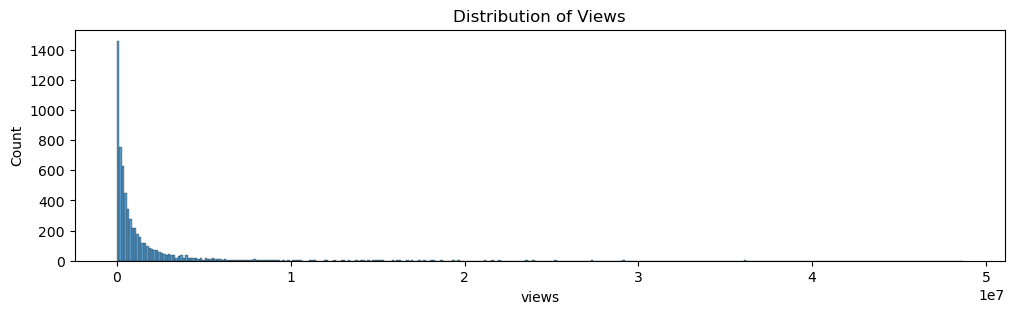

In [776]:
# Histrogram plot shows the data distribution of views is extremely right skewed

plt.figure(figsize=(12,3))

sns.histplot(data=df_new[df_new['views']<5e7], x='views');


plt.title('Distribution of Views')

# Distribution Plot

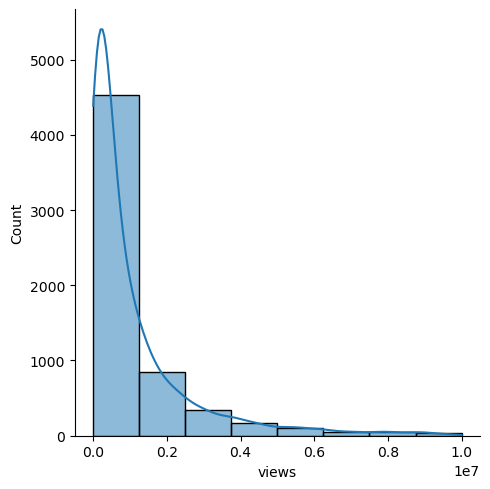

In [777]:
sns.displot(df_new[df_new['views'] < 10e6]['views'],bins=10^2,kde=True)


# QQ Plot

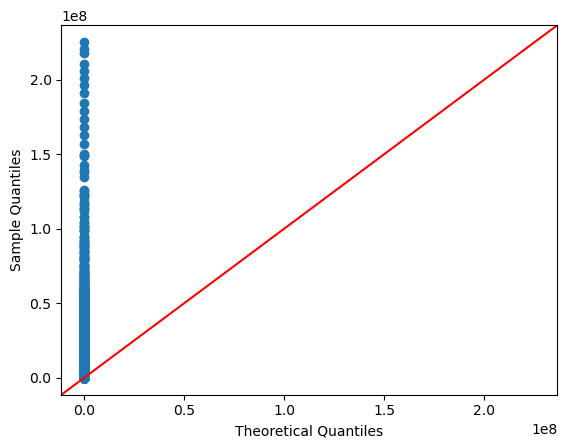

In [779]:
sm.qqplot(data=df['views'], line='45')
plt.show()

# The data is normally distributed if the blue dots follow the red line
# 45 degrees is used to find the intersection between Theoretical Quantiles and the sample results.
# If TQ VS Sample is the same it will form a 45 degree angle on the red straight line

# Boxplot

Text(0.5, 1.0, 'Distribution of Views per Category')

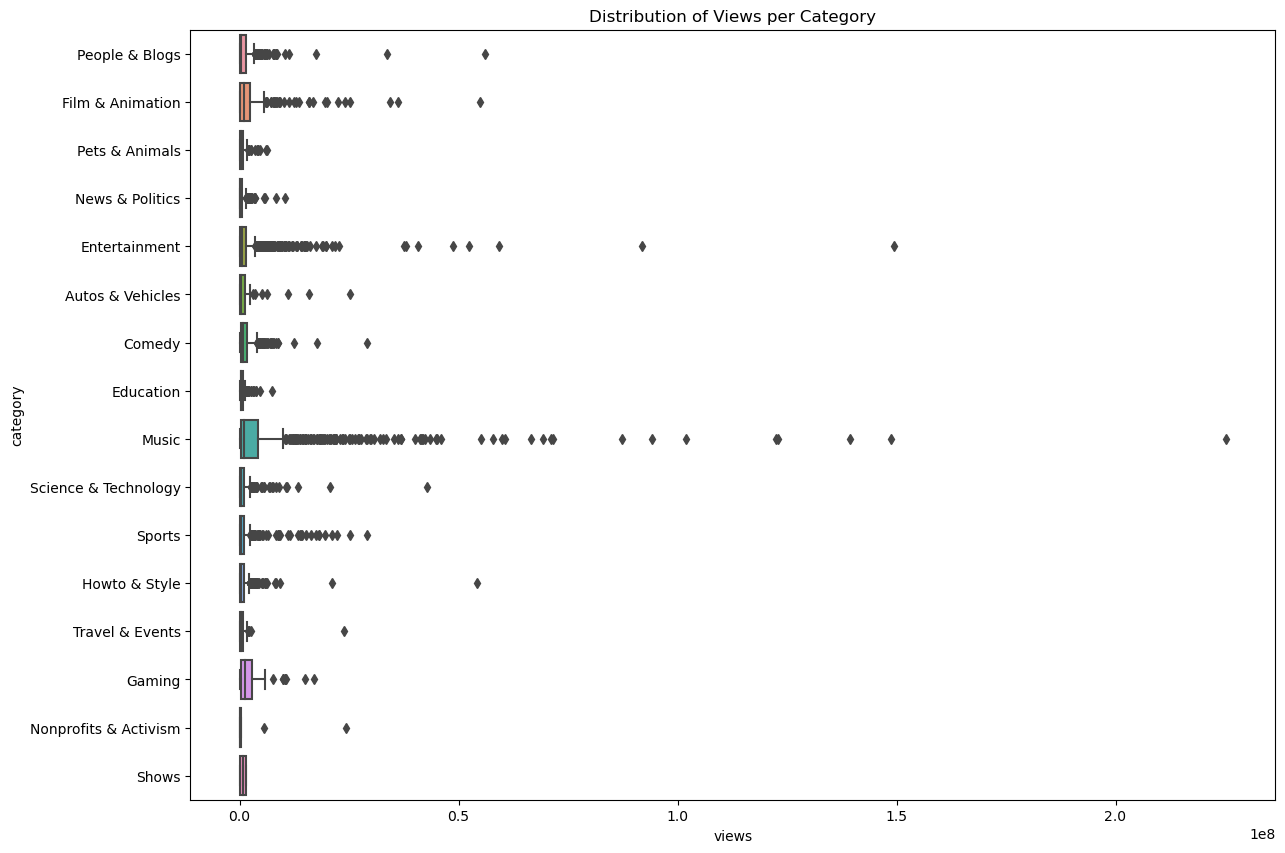

In [780]:
plt.figure(figsize=(14,10))

sns.boxplot(data=df_new, x='views', y='category');


plt.title('Distribution of Views per Category')

## Interpretation: 
Based on the data distribution visualization we draw a conlusion:
- Data distribution is not normal, identified right skewed
- Since the right skewed level is not biased refer to graphic, then normaltest is not necessary

---
---
### At this point the analysis is aimed to draw summary:
### How strong the correlations between views, likes, dislikes, comments, descriptions, and 'tag's over Youtube Trending?

---
## Correlation of each Main Feature

At this stage, the analyst attempt to find correlations from the 6 main Youtube features (views, likes, dislikes, comments, description, and tags):

Since the data identified not normally distributed, ***spearman*** is more suitable method to find correlations between features.

Finding correlation between Trending Count (How many time a video on a trending list) over the 6 features:
- views
- likes
- dislikes
- comments
- descriptions
- tag's

In [781]:
## Checking the correlation
df_new[['views', 'likes', 'dislikes', 'comment_count', 'length_desc', 'length_tags', 'trending_count']].corr(method='spearman')[['trending_count']].sort_values(by=['trending_count'], ascending=False).iloc[1:]


,trending_count
likes,0.425906
views,0.424629
dislikes,0.411880
comment_count,0.387875
length_desc,0.051093
length_tags,-0.007247


# Heatmap

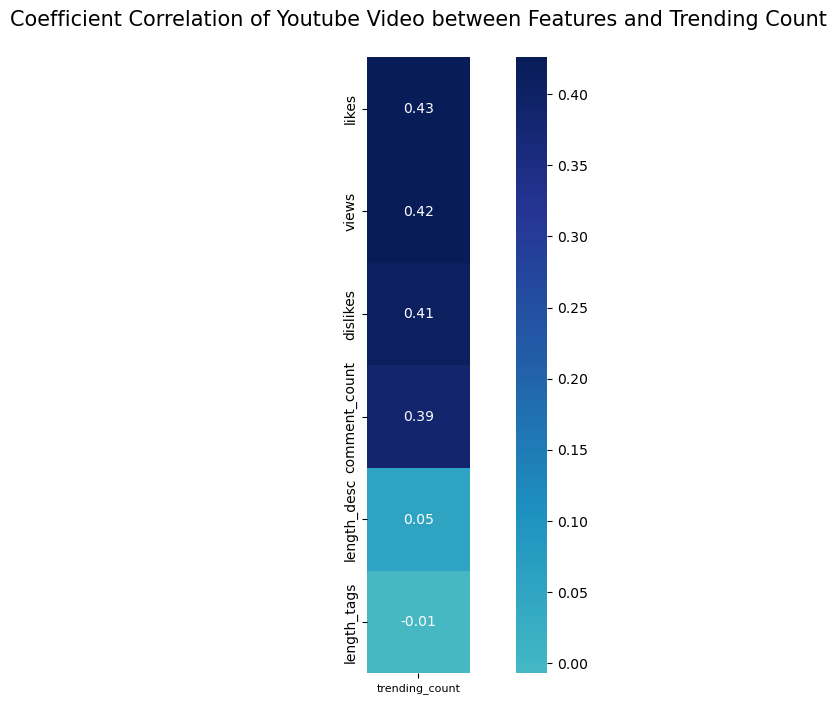

In [782]:
# Plotting on Heatmap
plt.figure(figsize=(12,8))
plt.title('Coefficient Correlation of Youtube Video between Features and Trending Count\n', fontsize=15)

corr_df_new = df_new[['views', 'likes', 'dislikes', 'comment_count', 'length_desc', 'length_tags', 'trending_count']].corr(method='spearman')[['trending_count']].sort_values(by=['trending_count'], ascending=False).iloc[1:]


sns.heatmap(data=corr_df_new, annot=True, cmap='YlGnBu', center=0, fmt='.2f', square=True)
plt.xticks(size=8)

plt.show()


# 'views', 'likes', 'dislikes', 'comment_count', 'length_desc', and 'length_tags' has weak correaltion with 'trending_count' 

## Interpretation:


- Based on the finding of the correlation trending count (how many times video recorded on treding list) with the main features of Yotube ('view', 'likes', 'dislike', 'comments', 'description', 'tags'). 
- The analyst conclude the correlation likelyhood is from moderate to very weak correlations.
    - views=        42,59 (moderate)
    - likes=	    42,46 (moderate)
    - comment=      41.11 (moderate)
    - dislikes=	    38.78 (weak)
    - description=	-5.10 (very weak)
    - tags=	        -0.72 (very weak)

In [783]:
## Checking the correlation
df_new[['views', 'likes', 'dislikes', 'comment_count', 'length_desc', 'length_tags']].corr(method='spearman')[['views']].sort_values(by=['views'], ascending=False).iloc[1:]

,views
likes,0.872553
dislikes,0.857830
comment_count,0.817256
length_tags,0.137426
length_desc,0.124238


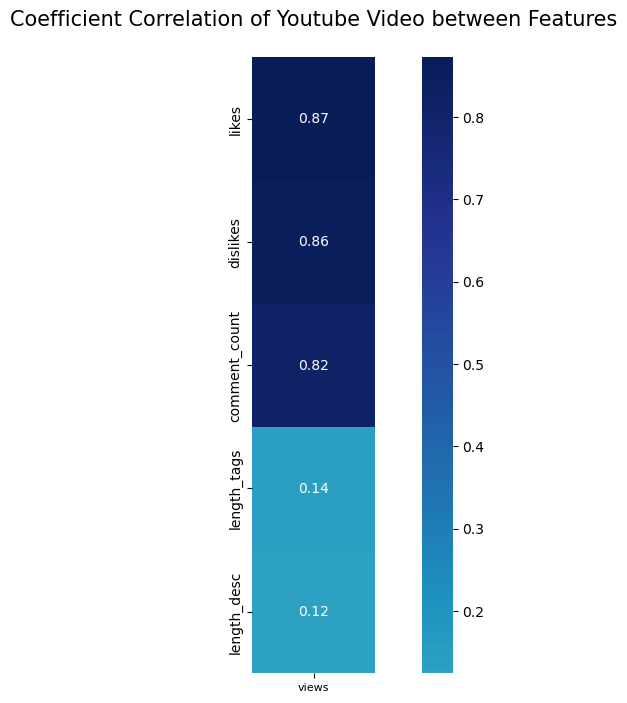

In [784]:
# Plotting on Heatmap
plt.figure(figsize=(12,8))
plt.title('Coefficient Correlation of Youtube Video between Features\n', fontsize=15)

corr_df_new = df_new[['views', 'likes', 'dislikes', 'comment_count', 'length_desc', 'length_tags']].corr(method='spearman')[['views']].sort_values(by=['views'], ascending=False).iloc[1:]



sns.heatmap(data=corr_df_new, annot=True, cmap='YlGnBu', center=0, fmt='.2f', square=True)
plt.xticks(size=8)

plt.show()


# 'views', 'likes', 'dislikes', 'comment_count', 'length_desc', and 'length_tags' has weak correaltion with 'trending_count' 

Views vs. Trending Count correlations

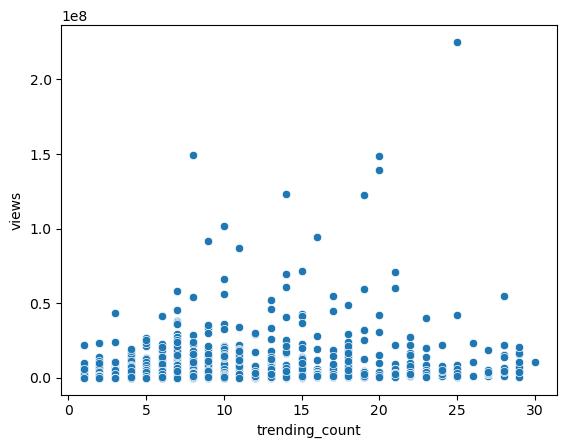

In [785]:
# Views and Trending Count Correlations

ax = sns.scatterplot(data=df_new, y='views', x='trending_count')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


In [786]:
# Eliminating outliers by filtering data using connditional 
views_trendingcount = df_new[~((df_new['views']>50e7))]
views_trendingcount

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,Kittens come out of the eggs in a Thai commerc...,122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0
2,KODzih-pYlU,2017-11-17,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,Molly is an god damn amazing human and she cha...,218186,7773,230,443,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100K-400K,4,2017-11-11,18:08:04,18,8,2017,11,17,6 days,6,2017-11-14,2017-11-17,732.0,113.0
3,8mhTWqWlQzU,2017-11-16,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,I found this online dollar store called ShopMi...,3031863,121285,1186,6852,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1M-4M,3,2017-11-11,01:19:33,1,19,2017,11,16,5 days,5,2017-11-14,2017-11-16,665.0,405.0
4,pa_oUisZZy0,2017-11-16,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11T00:30:16.000Z,I'm just...I'm flattered.\n\nCredits: https://...,243412,7782,104,340,https://i.ytimg.com/vi/pa_oUisZZy0/default.jpg,False,False,False,I'm just...I'm flattered.\n\nCredits: https://...,People & Blogs,100K-400K,3,2017-11-11,00:30:16,0,30,2017,11,16,5 days,5,2017-11-14,2017-11-16,649.0,243.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,pwGbwYAfSmg,2018-06-04,5 books worth reading this summer,Bill Gates,29,2018-05-21T13:30:33.000Z,If you’re looking for something to read over t...,333587,10918,161,613,https://i.ytimg.com/vi/pwGbwYAfSmg/default.jpg,False,False,False,If you’re looking for something to read over t...,Nonprofits & Activism,100K-400K,9,2018-05-21,13:30:33,13,30,2018,6,4,14 days,14,2018-05-27,2018-06-04,473.0,12.0
6344,lM0yu7c6lQk,2018-01-02,You're not crazy. Apple is slowing down older ...,CNET,43,2017-12-22T01:16:16.000Z,Apple comes clean after overwhelming evidence ...,179723,4763,247,1998,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...,Shows,100K-400K,11,2017-12-22,01:16:16,1,16,2018,1,2,11 days,11,2017-12-23,2018-01-02,541.0,485.0
6345,Q1CFfU2gXHw,2018-01-30,Apple HomePod: Everything to know before you b...,CNET,43,2018-01-24T20:08:16.000Z,We'll break down all the new Apple HomePod det...,72607,1130,113,264,https://i.ytimg.com/vi/Q1CFfU2gXHw/default.jpg,False,False,False,We'll break down all the new Apple HomePod det...,Shows,50K-90K,5,2018-01-24,20:08:16,20,8,2018,1,30,6 days,6,2018-01-26,2018-01-30,604.0,458.0
6346,7_FJUSBFbJM,2018-04-29,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,43,2018-04-12T21:00:12.000Z,"In the season 5 premiere of Game of Zones, the...",1445949,33261,475,2174,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,Fa

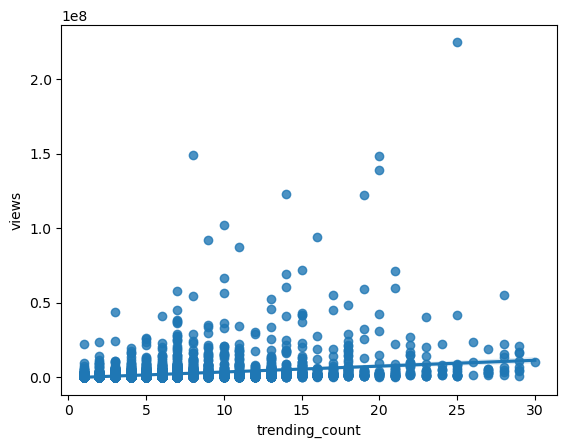

In [787]:
ax = sns.regplot(data=views_trendingcount, y='views', x='trending_count')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Views vs. Likes correlations

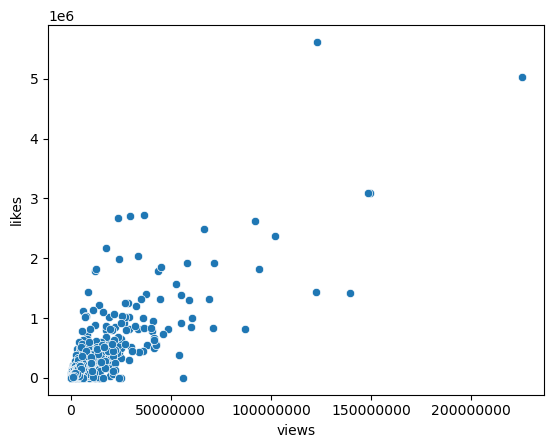

In [788]:
# Views and Likes Correlations

ax = sns.scatterplot(data=df_new, x='views', y='likes')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


In [789]:
# Eliminating outliers by filtering data using connditional 
views_likes = df_new[~((df_new['views']>1e8) & (df_new['likes']>4e6))]

In [790]:
views_likes

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,Kittens come out of the eggs in a Thai commerc...,122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0
2,KODzih-pYlU,2017-11-17,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,Molly is an god damn amazing human and she cha...,218186,7773,230,443,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100K-400K,4,2017-11-11,18:08:04,18,8,2017,11,17,6 days,6,2017-11-14,2017-11-17,732.0,113.0
3,8mhTWqWlQzU,2017-11-16,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,I found this online dollar store called ShopMi...,3031863,121285,1186,6852,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1M-4M,3,2017-11-11,01:19:33,1,19,2017,11,16,5 days,5,2017-11-14,2017-11-16,665.0,405.0
4,pa_oUisZZy0,2017-11-16,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11T00:30:16.000Z,I'm just...I'm flattered.\n\nCredits: https://...,243412,7782,104,340,https://i.ytimg.com/vi/pa_oUisZZy0/default.jpg,False,False,False,I'm just...I'm flattered.\n\nCredits: https://...,People & Blogs,100K-400K,3,2017-11-11,00:30:16,0,30,2017,11,16,5 days,5,2017-11-14,2017-11-16,649.0,243.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,pwGbwYAfSmg,2018-06-04,5 books worth reading this summer,Bill Gates,29,2018-05-21T13:30:33.000Z,If you’re looking for something to read over t...,333587,10918,161,613,https://i.ytimg.com/vi/pwGbwYAfSmg/default.jpg,False,False,False,If you’re looking for something to read over t...,Nonprofits & Activism,100K-400K,9,2018-05-21,13:30:33,13,30,2018,6,4,14 days,14,2018-05-27,2018-06-04,473.0,12.0
6344,lM0yu7c6lQk,2018-01-02,You're not crazy. Apple is slowing down older ...,CNET,43,2017-12-22T01:16:16.000Z,Apple comes clean after overwhelming evidence ...,179723,4763,247,1998,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...,Shows,100K-400K,11,2017-12-22,01:16:16,1,16,2018,1,2,11 days,11,2017-12-23,2018-01-02,541.0,485.0
6345,Q1CFfU2gXHw,2018-01-30,Apple HomePod: Everything to know before you b...,CNET,43,2018-01-24T20:08:16.000Z,We'll break down all the new Apple HomePod det...,72607,1130,113,264,https://i.ytimg.com/vi/Q1CFfU2gXHw/default.jpg,False,False,False,We'll break down all the new Apple HomePod det...,Shows,50K-90K,5,2018-01-24,20:08:16,20,8,2018,1,30,6 days,6,2018-01-26,2018-01-30,604.0,458.0
6346,7_FJUSBFbJM,2018-04-29,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,43,2018-04-12T21:00:12.000Z,"In the season 5 premiere of Game of Zones, the...",1445949,33261,475,2174,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,Fa

''

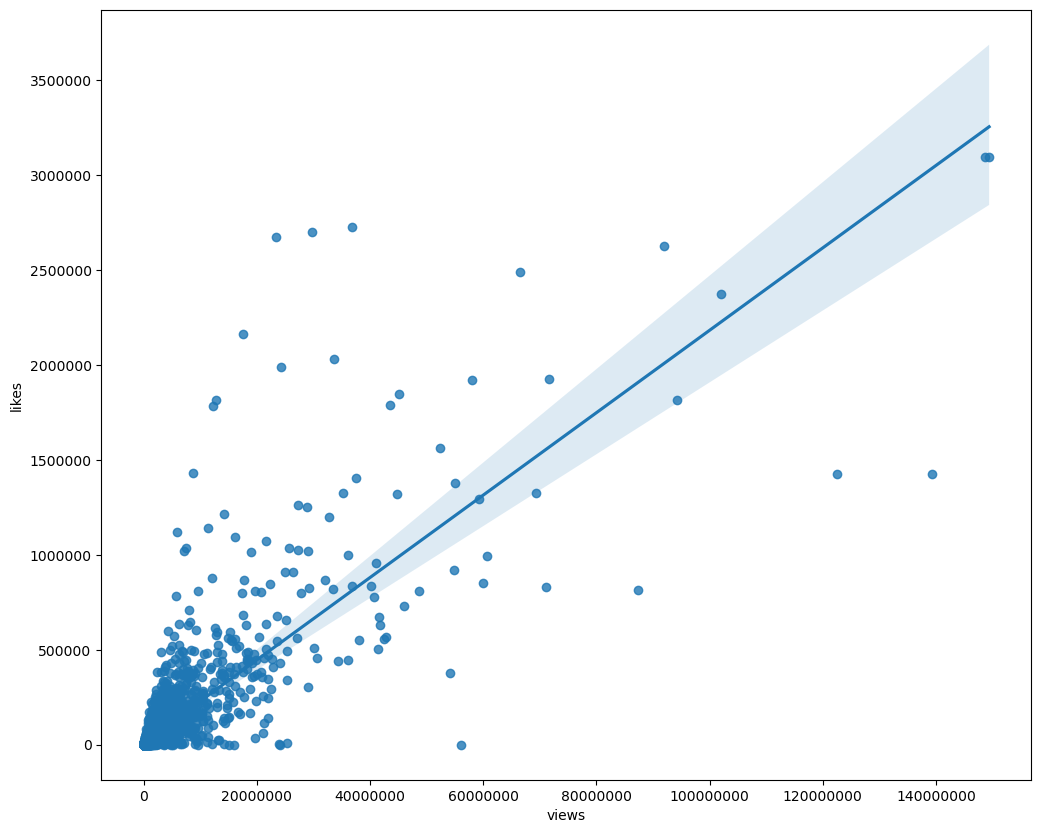

In [791]:
plt.figure(figsize=(12,10))
ax = sns.regplot(data=views_likes, x='views', y='likes')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

;

Views vs. Dislikes correlations

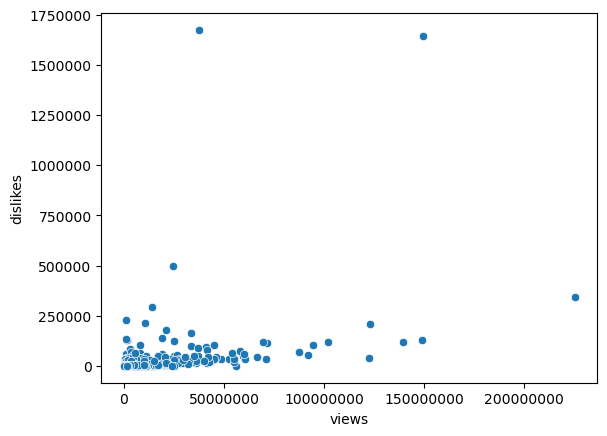

In [792]:
# Views and Dislikes Correlations

ax = sns.scatterplot(data=df_new, x='views', y='dislikes')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))



''

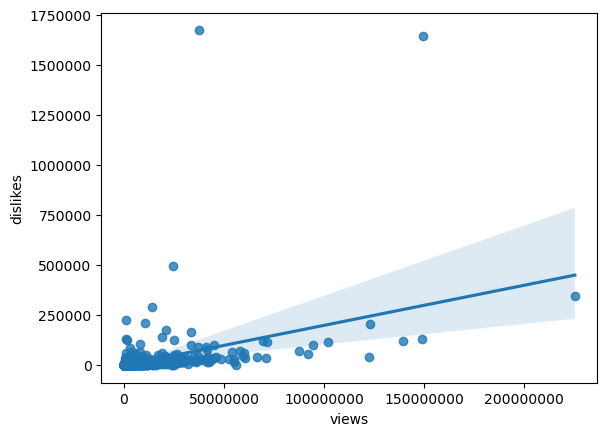

In [793]:
ax = sns.regplot(data=df_new, x='views', y='dislikes')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

;

Views vs. Comment correlations

''

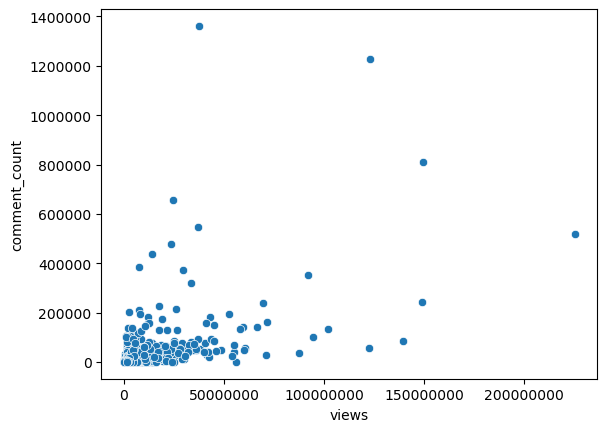

In [794]:
# Views and Comment Correlations

ax = sns.scatterplot(data=df_new, x='views', y='comment_count')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

;

''

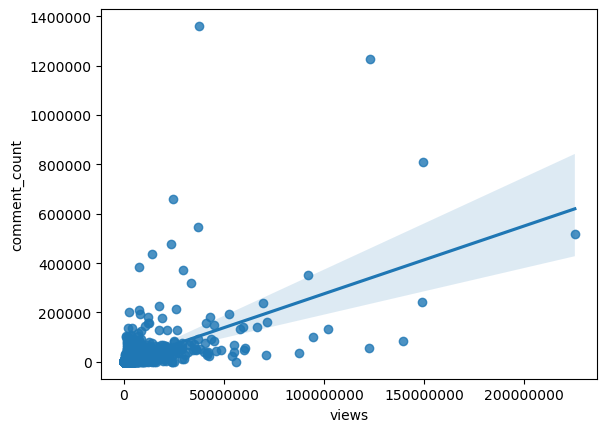

In [795]:
ax = sns.regplot(data=df_new, x='views', y='comment_count')


ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

;

# Hilangkan data outlier

Views vs. Descriptions correlations

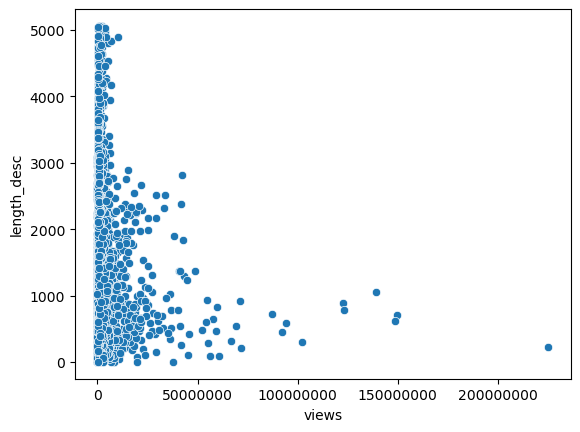

In [796]:
# Views and Description Correlations

ax = sns.scatterplot(data=df_new, x='views', y='length_desc')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

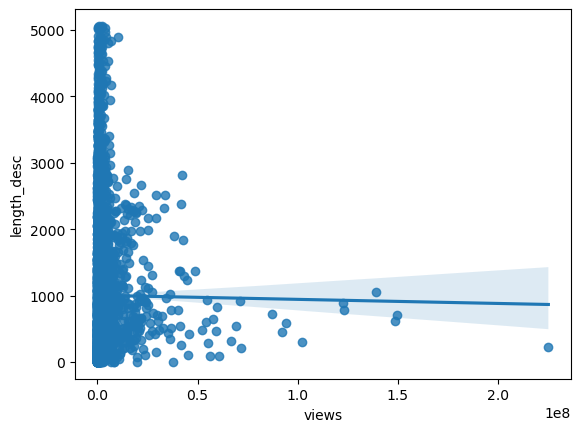

In [797]:
# Views and Description Correlations

sns.regplot(data=df_new, x='views', y='length_desc')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

Views vs. Tags corralations

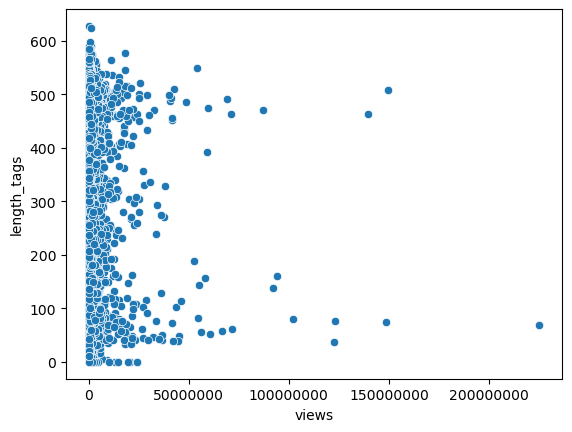

In [798]:
# Views and Tags Correlations

ax = sns.scatterplot(data=df_new, x='views', y='length_tags')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

<AxesSubplot:xlabel='views', ylabel='length_tags'>

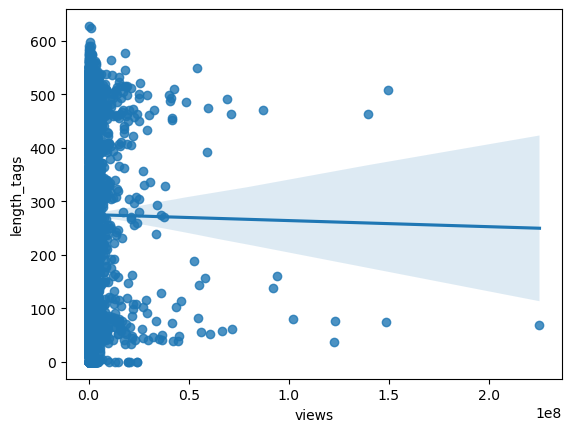

In [799]:
sns.regplot(data=df_new, x='views', y='length_tags')


---
### ***What video categories are the most popular for the audience in US?***

## Views median by Video Category

In [800]:
views_category = df_new.groupby('category').median()['views'].sort_values(ascending=False)
views_category = views_category.to_frame().reset_index()

In [801]:
views_category

,category,views
0,Gaming,1316002.0
1,Music,1096158.0
2,Film & Animation,910966.0
3,Comedy,790545.5
4,Shows,765522.0
5,Entertainment,602853.0
6,Pets & Animals,434946.0
7,Science & Technology,429830.0
8,Howto & Style,426985.0
9,Sports,405781.0


''

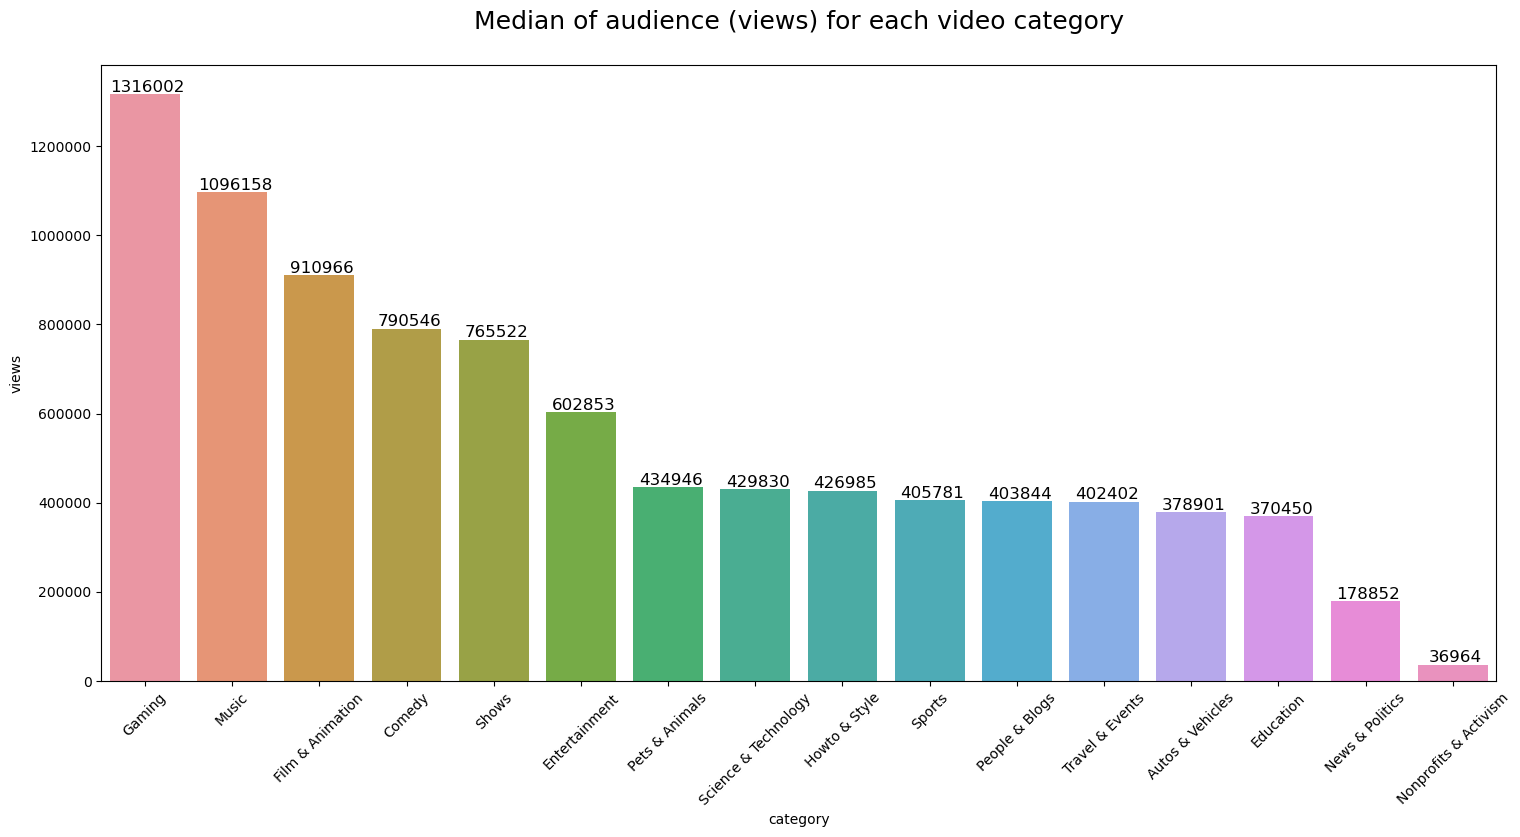

In [843]:
plt.figure(figsize=(18, 8))
plt.title('Median of audience (views) for each video category\n', size=18)


ax = sns.barplot(data=views_category, x='category', y='views', estimator=np.median, ci=0);

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                    ha='center', 
                    va='center',
                    size=12, 
                    textcoords='offset points',
                    xytext=(2, 5))

plt.xticks(rotation = 45)
;

In [845]:
df_new['trending_date']

0      2017-11-20
1      2017-11-17
2      2017-11-17
3      2017-11-16
4      2017-11-16
          ...    
6343   2018-06-04
6344   2018-01-02
6345   2018-01-30
6346   2018-04-29
6347   2018-06-06
Name: trending_date, Length: 6348, dtype: datetime64[ns]

In [844]:
df_new['view_category']

0           1M-4M
1       100K-400K
2       100K-400K
3           1M-4M
4       100K-400K
          ...    
6343    100K-400K
6344    100K-400K
6345      50K-90K
6346        1M-4M
6347        1M-4M
Name: view_category, Length: 6348, dtype: object

## Interpretation 

Based on the finding of the data and visualtizatoin, shows there are top 10 categories with the most views



In [803]:
views_category.head(10)

,category,views
0,Gaming,1316002.0
1,Music,1096158.0
2,Film & Animation,910966.0
3,Comedy,790545.5
4,Shows,765522.0
5,Entertainment,602853.0
6,Pets & Animals,434946.0
7,Science & Technology,429830.0
8,Howto & Style,426985.0
9,Sports,405781.0


## The Most Trending Video by Category

In [804]:
# Number of videos per category
df_totvid = df_new.groupby('category')['video_id'].count().sort_values(ascending=False)
df_totvid =df_totvid.to_frame().reset_index().rename(columns={'video_id':'total_videos'})


In [805]:
df_totvid

,category,total_videos
0,Entertainment,1619
1,Music,801
2,Howto & Style,594
3,Comedy,544
4,News & Politics,504
5,People & Blogs,495
6,Sports,449
7,Science & Technology,381
8,Film & Animation,319
9,Education,251


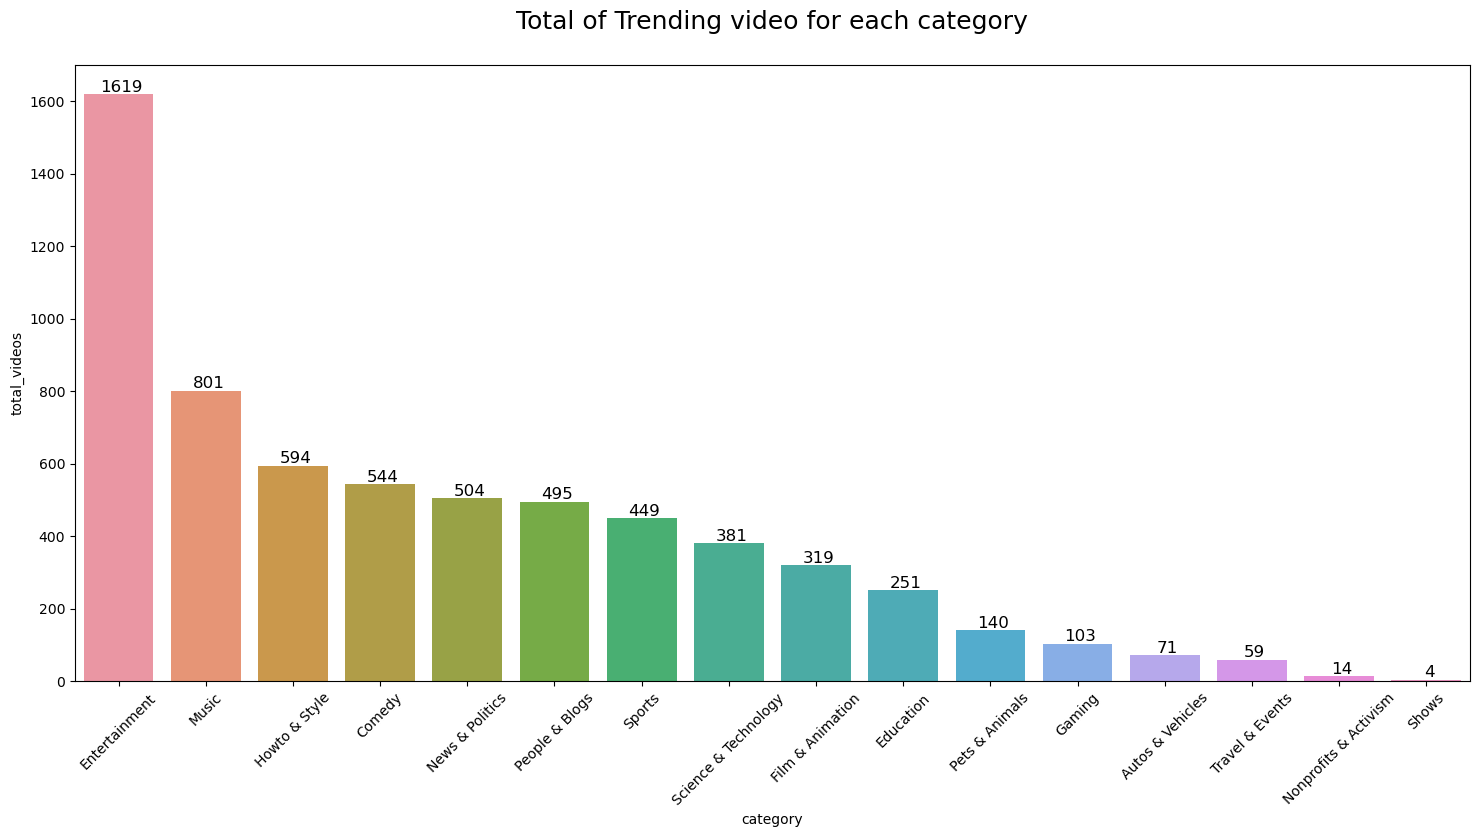

In [806]:
plt.figure(figsize=(18, 8))
plt.title('Total of Trending video for each category\n', size=18)


ax = sns.barplot(data=df_totvid, x='category', y='total_videos', estimator=np.sum);


ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                    ha='center', 
                    va='center',
                    size=12, 
                    textcoords='offset points',
                    xytext=(2, 5))

plt.xticks(rotation = 45);

## The Most Trending Video in US

In [807]:
df_new.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,Kittens come out of the eggs in a Thai commerc...,122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0


In [808]:
df_new.describe().loc["75%"]

# Top 25 %

category_id                        25.0
views                        1473577.75
likes                          38405.75
dislikes                         1503.0
comment_count                   4057.75
trending_count                      8.0
publish_hour_hr                    18.0
publish_hour_min                   35.0
trending_date_year               2018.0
trending_date_month                11.0
trending_date_date                 22.0
video_temperature      10 days 00:00:00
n_video_temperature                10.0
length_desc                      1356.0
length_tags                       441.0
Name: 75%, dtype: object

In [809]:
df_new['views'].quantile(0.9)

# Top 10 %

3689828.9000000004

Set condition rules to analyze the top trending categories based on the highest number the following factors:
- View count
- How quickly the video is generating views (i.e. “temperature”)
- Level of engagement
- The age of the video

At this phase, analyst will calcualte the trending score of each category based on youtube trending algorithm

In [810]:
# Define selection condition 

cat_sort = df_new[(df_new['views']>1473577.75) & (df_new['likes']>38405.75) & (df_new['dislikes']>1503.0) & (df_new['comment_count']>4057.75) & (df_new['trending_count']>8.0) & (df_new['n_video_temperature']>10)].sort_values(by=(['views', 'likes', 'dislikes', 'comment_count', 'trending_count', 'n_video_temperature']), ascending=False)
cat_sort.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
5031,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,“This is America” by Childish Gambino http://s...,225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,200M,25,2018-05-06,04:00:07,4,0,2018,6,2,27 days,27,2018-05-08,2018-06-02,227.0,69.0


In [811]:
# Check category 
df_new['category'].unique()

array(['People & Blogs', 'Film & Animation', 'Pets & Animals',
       'News & Politics', 'Entertainment', 'Autos & Vehicles', 'Comedy',
       'Education', 'Music', 'Science & Technology', 'Sports',
       'Howto & Style', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [812]:
# Check how many categories were exist on the trending list data
df_new['category'].nunique()

16

In [813]:
top10_categories =cat_sort.groupby('category')['views', 'likes', 'dislikes', 'comment_count', 'trending_count', 'video_temperature', 'n_video_temperature'].sum().sort_values(by=(['views', 'likes', 'dislikes', 'comment_count', 'trending_count', 'n_video_temperature']), ascending=False).reset_index()
top10_categories = top10_categories.head(10)

In [814]:
# Youtube trending score 
top10_categories['trending_score'] = top10_categories['views'] + top10_categories['likes'] + top10_categories['dislikes'] + top10_categories['comment_count'] + top10_categories['trending_count'] + top10_categories['n_video_temperature']
top10_categories['trending_rate'] = round((top10_categories['trending_score']) / ((top10_categories['trending_score'].sum())) * 100, 2)
top10_categories

,category,views,likes,dislikes,comment_count,trending_count,n_video_temperature,trending_score,trending_rate
0,Music,2758669035,68241404,2894682,6062735,1917,2179,2835871952,63.13
1,Entertainment,582365346,14925439,595831,1686172,1038,1177,599575003,13.35
2,Film & Animation,236575005,4850654,143700,457457,373,408,242027597,5.39
3,Sports,172580569,4403908,165792,411337,189,242,177562037,3.95
4,Comedy,145031117,6067090,214191,496022,442,518,151809380,3.38
5,People & Blogs,139146436,4896103,346181,543966,428,499,144933613,3.23
6,Howto & Style,109495500,3789815,156307,593252,462,535,114035871,2.54
7,Gaming,98288164,2575464,374790,522772,300,333,101761823,2.27
8,Science & Technology,92087051,1911418,97100,359911,255,284,94456019,2.10
9,Education,28236463,1346720,26178,122259,133,143,29731896,0.66


In [850]:
top10_categories.to_csv('/Users/ichsanlukita/Documents/Purwadhika - Data Science/Python/Capstone project - Module 2/Top 10 Trending.csv')

In [815]:
top10_categories['trending_score'].sum()

4491765191

In [816]:
(2835871952 / 4491765191) * 100

63.134910918365506

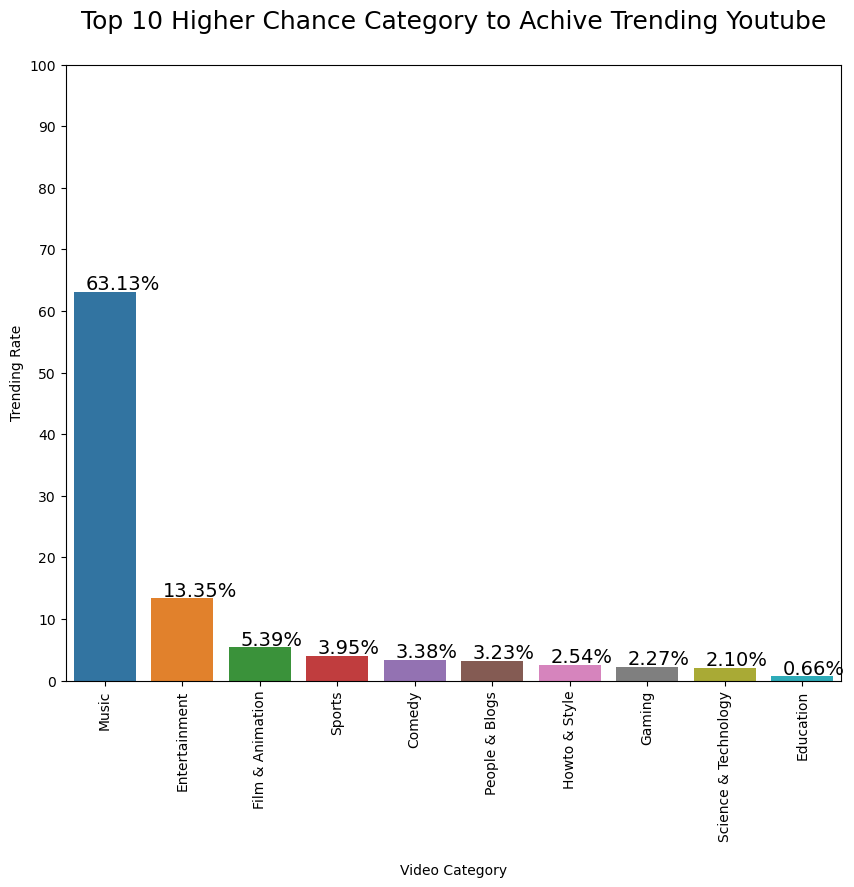

In [817]:
# Defining the plot size
plt.figure(figsize=(10, 8))
plt.title('Top 10 Higher Chance Category to Achive Trending Youtube\n', size=18)

ax = sns.barplot(data=top10_categories, x='category', y='trending_rate', estimator=np.median)

# Iterrating over the bars one-by-one

for bar in ax.patches:
        percentage = '{:.2f}%'.format(bar.get_height())
        x = bar.get_x() + bar.get_width() / 2 - 0.25
        y = bar.get_y() + bar.get_height() + 0.38
        ax.annotate(percentage, 
                    (x, y), 
                    size = 14
                    )


plt.xticks(rotation=90)
plt.xlabel('\nVideo Category')
plt.ylabel('Trending Rate')
plt.ylim(0,100,10)
plt.yticks([i for i in range(0,101,10)])

plt.show()

Interpretation:

In order to increase the chances for the video to become trending:
- Our recommendation for prospective content creators in US it would be better to start with these 3 categories: Music 63%, Entertainment 13%, or Film & Animations 5%

- Since it have the highest trending scores of all categories, which leads to get greater trending opportunities for the channels.




---
## *What the prime to publish youtube video?*

In [818]:
df_new.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,Kittens come out of the eggs in a Thai commerc...,122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0


In [819]:
df_new['publish_hour'].mode()

0    16:00:01
Name: publish_hour, dtype: object

In [820]:
# Create new column for day time categori based on conditional selections

df_new.loc[(df_new['publish_hour_hr'] == 0), 'time_category'] = 'Midnight'
df_new.loc[(df_new['publish_hour_hr'] > 0) & (df_new['publish_hour_hr'] <= 5), 'time_category'] = 'Early Morning'
df_new.loc[(df_new['publish_hour_hr'] > 5) & (df_new['publish_hour_hr'] <= 11), 'time_category'] = 'Morning'
df_new.loc[(df_new['publish_hour_hr'] >= 12) & (df_new['publish_hour_hr']<= 15), 'time_category'] = 'Afternoon'
df_new.loc[(df_new['publish_hour_hr'] >=16) & (df_new['publish_hour_hr'] <= 18), 'time_category'] = 'Evening'
df_new.loc[(df_new['publish_hour_hr'] >=17) & (df_new['publish_hour_hr'] <= 23), 'time_category'] = 'Night'


# Define new column
cols = df_new.columns.tolist()
column_to_move = 'time_category'
new_position = 21

# Insert new column
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
df_new = df_new[cols]


df_new.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,time_category,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,Night,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,Kittens come out of the eggs in a Thai commerc...,122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,Morning,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0
2,KODzih-pYlU,2017-11-17,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,Molly is an god damn amazing human and she cha...,218186,7773,230,443,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100K-400K,4,2017-11-11,18:08:04,Night,18,8,2017,11,17,6 days,6,2017-11-14,2017-11-17,732.0,113.0


In [821]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go 


Text(0.5, 1.0, 'Median Views Based on Upload Time in a Day')

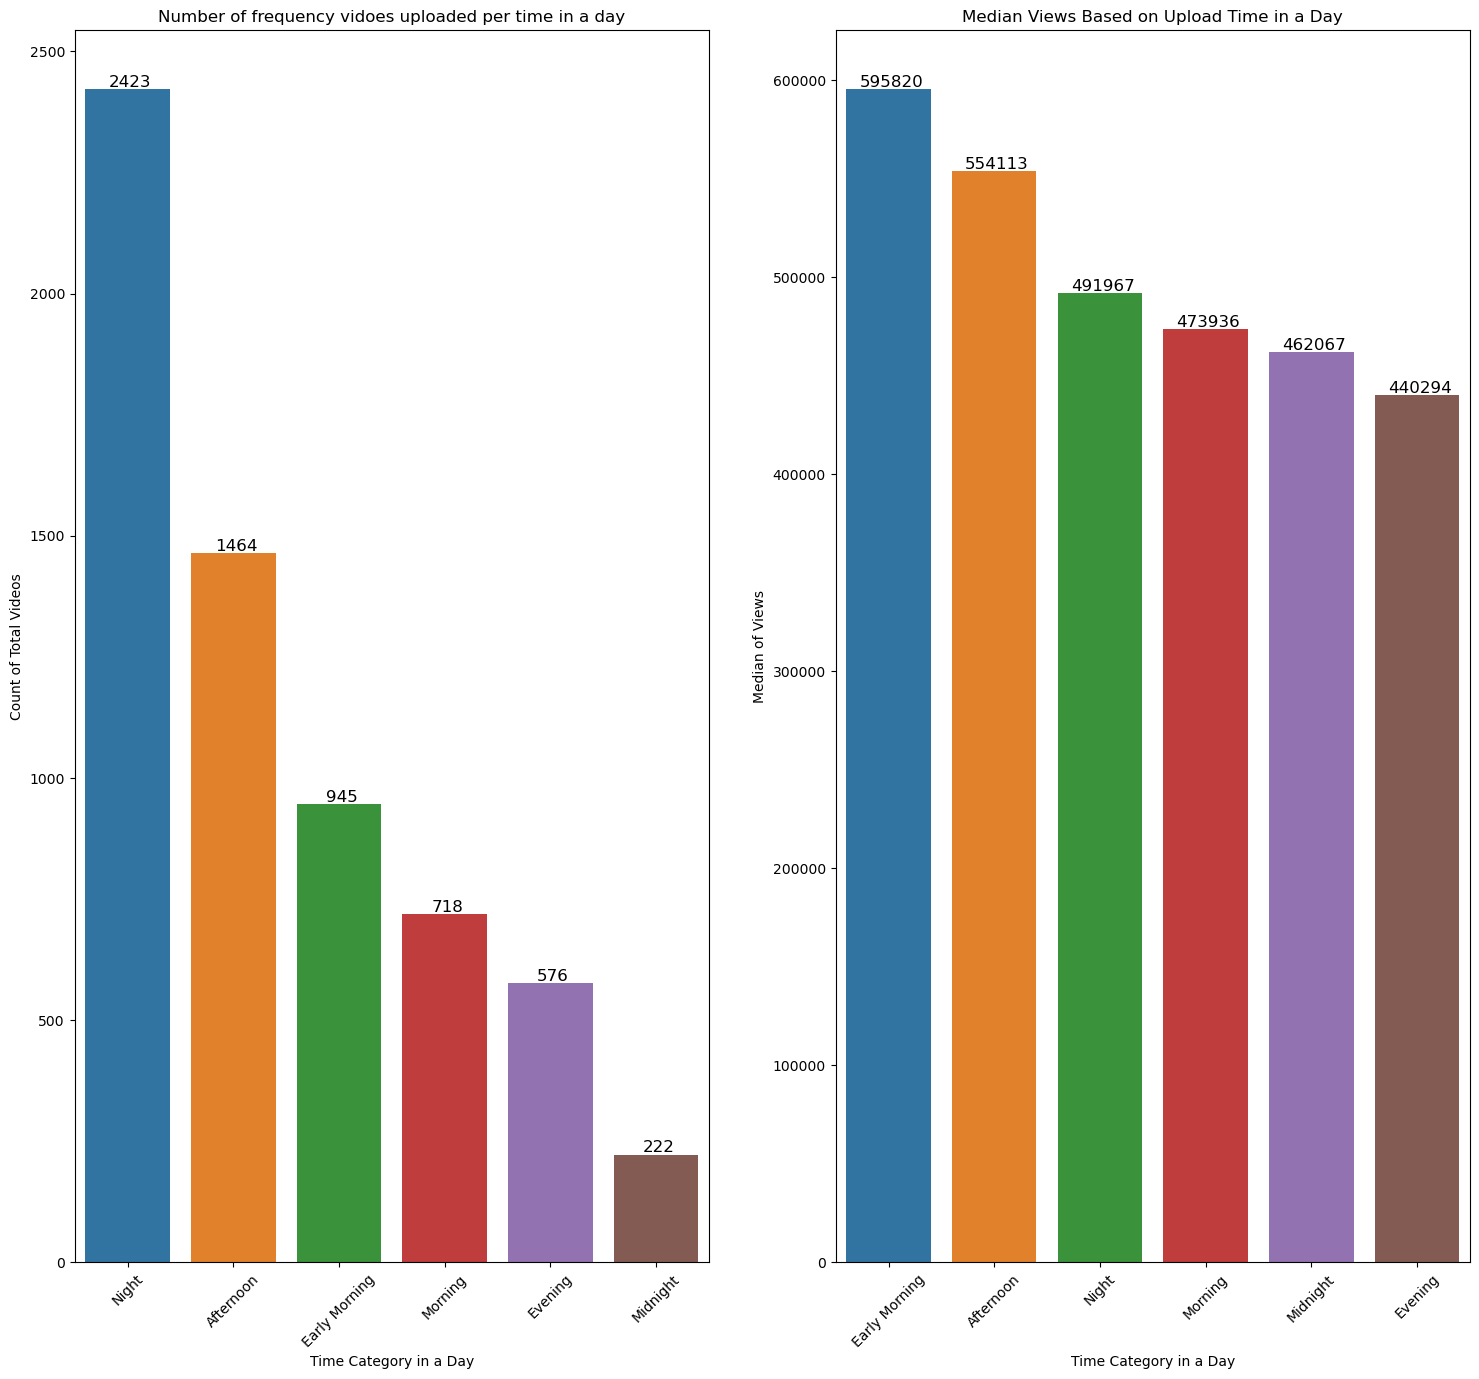

In [822]:
plt.figure(figsize=(18,16))

# # Count plot number of vidoes uploaded per time in a day


plt.subplot(1,2,1)
ax = sns.countplot(
    data=df_new, 
    x='time_category', 
    order=df_new['time_category'].value_counts().index)
# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                    ha='center', 
                    va='center',
                    size=12, 
                    textcoords='offset points',
                    xytext=(2, 5))
plt.xticks(rotation = 45)
plt.xlabel('Time Category in a Day')
plt.ylabel('Count of Total Videos')
plt.title('Number of frequency vidoes uploaded per time in a day')


# Median views according to the upload time in a day
plt.subplot(1,2,2)
ax = sns.barplot(
    data=df_new, 
    x='time_category', 
    y='views', 
    ci=0, 
    estimator=np.median, 
    order=df_new.groupby('time_category').median()['views'].sort_values(ascending=False).index);
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                    ha='center', 
                    va='center',
                    size=12, 
                    textcoords='offset points',
                    xytext=(2, 5))
                    
plt.xticks(rotation = 45)
plt.xlabel('Time Category in a Day')
plt.ylabel('Median of Views')
plt.title('Median Views Based on Upload Time in a Day')




# jumlah pakai chi square
# Median kruskal wallis

In [823]:
# Sorting views median by time category
# df_new.groupby('time_category').median()['views'].sort_values(ascending=False).index

In [824]:
df_new

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,time_category,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,Night,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,Kittens come out of the eggs in a Thai commerc...,122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,Morning,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0
2,KODzih-pYlU,2017-11-17,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,Molly is an god damn amazing human and she cha...,218186,7773,230,443,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100K-400K,4,2017-11-11,18:08:04,Night,18,8,2017,11,17,6 days,6,2017-11-14,2017-11-17,732.0,113.0
3,8mhTWqWlQzU,2017-11-16,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,I found this online dollar store called ShopMi...,3031863,121285,1186,6852,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1M-4M,3,2017-11-11,01:19:33,Early Morning,1,19,2017,11,16,5 days,5,2017-11-14,2017-11-16,665.0,405.0
4,pa_oUisZZy0,2017-11-16,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11T00:30:16.000Z,I'm just...I'm flattered.\n\nCredits: https://...,243412,7782,104,340,https://i.ytimg.com/vi/pa_oUisZZy0/default.jpg,False,False,False,I'm just...I'm flattered.\n\nCredits: https://...,People & Blogs,100K-400K,3,2017-11-11,00:30:16,Midnight,0,30,2017,11,16,5 days,5,2017-11-14,2017-11-16,649.0,243.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,pwGbwYAfSmg,2018-06-04,5 books worth reading this summer,Bill Gates,29,2018-05-21T13:30:33.000Z,If you’re looking for something to read over t...,333587,10918,161,613,https://i.ytimg.com/vi/pwGbwYAfSmg/default.jpg,False,False,False,If you’re looking for something to read over t...,Nonprofits & Activism,100K-400K,9,2018-05-21,13:30:33,Afternoon,13,30,2018,6,4,14 days,14,2018-05-27,2018-06-04,473.0,12.0
6344,lM0yu7c6lQk,2018-01-02,You're not crazy. Apple is slowing down older ...,CNET,43,2017-12-22T01:16:16.000Z,Apple comes clean after overwhelming evidence ...,179723,4763,247,1998,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...,Shows,100K-400K,11,2017-12-22,01:16:16,Early Morning,1,16,2018,1,2,11 days,11,2017-12-23,2018-01-02,541.0,485.0
6345,Q1CFfU2gXHw,2018-01-30,Apple HomePod: Everything to know before you b...,CNET,43,2018-01-24T20:08:16.000Z,We'll break down all the new Apple HomePod det...,72607,1130,113,264,https://i.ytimg.com/vi/Q1CFfU2gXHw/default.jpg,False,False,False,We'll break down all the new Apple HomePod det...,Shows,50K-90K,5,2018-01-24,20:08:16,Night,20,8,2018,1,30,6 days,6,2018-01-26,2018-01-30,604.0,458.0
6346,7_FJUSBFbJM,2018-04-29,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,43,2018-04-12T21:00:12.000Z,"In the season 5 premiere of Game of Zo

In [825]:
df_new['day_name'] = df_new['publish_date'].dt.day_name() 
df_new.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_category,trending_count,publish_date,publish_hour,time_category,publish_hour_hr,publish_hour_min,trending_date_year,trending_date_month,trending_date_date,video_temperature,n_video_temperature,min_trending_date,max_trending_date,length_desc,length_tags,day_name
0,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1M-4M,7,2017-11-13,17:13:01,Night,17,13,2017,11,20,7 days,7,2017-11-14,2017-11-20,1555.0,15.0,Monday
1,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,Kittens come out of the eggs in a Thai commerc...,122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100K-400K,4,2017-04-21,06:47:32,Morning,6,47,2017,11,17,210 days,210,2017-11-14,2017-11-17,102.0,25.0,Friday
2,KODzih-pYlU,2017-11-17,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,Molly is an god damn amazing human and she cha...,218186,7773,230,443,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100K-400K,4,2017-11-11,18:08:04,Night,18,8,2017,11,17,6 days,6,2017-11-14,2017-11-17,732.0,113.0,Saturday
3,8mhTWqWlQzU,2017-11-16,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,I found this online dollar store called ShopMi...,3031863,121285,1186,6852,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1M-4M,3,2017-11-11,01:19:33,Early Morning,1,19,2017,11,16,5 days,5,2017-11-14,2017-11-16,665.0,405.0,Saturday
4,pa_oUisZZy0,2017-11-16,Mark Ruffalo Reads Hilarious Thirst Tweets,BuzzFeed Celeb,22,2017-11-11T00:30:16.000Z,I'm just...I'm flattered.\n\nCredits: https://...,243412,7782,104,340,https://i.ytimg.com/vi/pa_oUisZZy0/default.jpg,False,False,False,I'm just...I'm flattered.\n\nCredits: https://...,People & Blogs,100K-400K,3,2017-11-11,00:30:16,Midnight,0,30,2017,11,16,5 days,5,2017-11-14,2017-11-16,649.0,243.0,Saturday


In [826]:
df_new['day_name'].value_counts().index

Index(['Wednesday', 'Tuesday', 'Thursday', 'Friday', 'Monday', 'Sunday',
       'Saturday'],
      dtype='object')

Text(0.5, 1.0, 'Median Views Based on Upload Day')

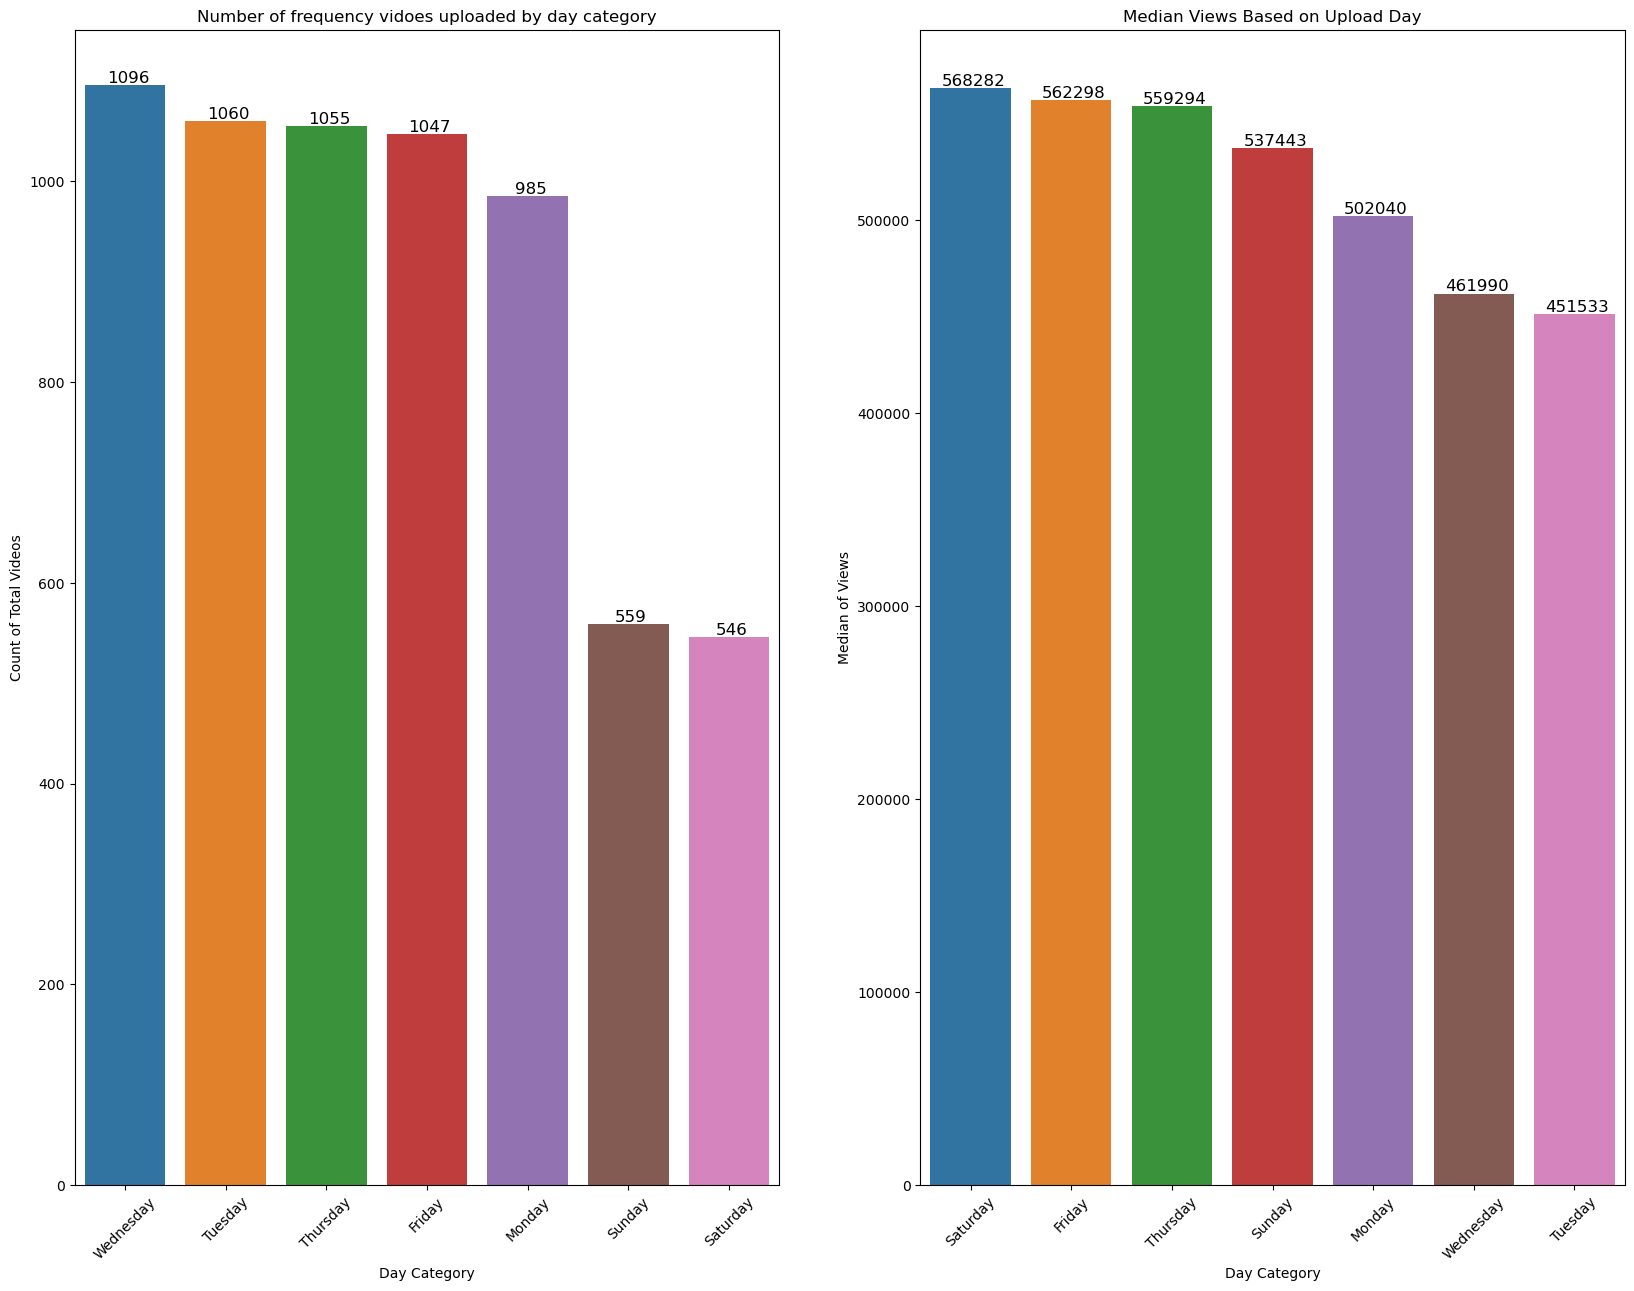

In [827]:
plt.figure(figsize=(20,15))

# Number of views frequnecy according to the trending day
plt.subplot(1,2,1)
ax = sns.countplot(data=df_new, x='day_name', order=df_new['day_name'].value_counts().index)
# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                    ha='center', 
                    va='center',
                    size=12, 
                    textcoords='offset points',
                    xytext=(2, 5))
plt.xticks(rotation = 45)
plt.xlabel('Day Category')
plt.ylabel('Count of Total Videos')
plt.title('Number of frequency vidoes uploaded by day category')

# Median views according to the upload time in a day
plt.subplot(1,2,2)
ax = sns.barplot(
    data=df_new, 
    x='day_name', 
    y='views', 
    ci=0, 
    estimator=np.median, 
    order=df_new.groupby('day_name').median()['views'].sort_values(ascending=False).index)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), 
                    ha='center', 
                    va='center',
                    size=12, 
                    textcoords='offset points',
                    xytext=(2, 5))
plt.xticks(rotation = 45)
plt.xlabel('Day Category')
plt.ylabel('Median of Views')
plt.title('Median Views Based on Upload Day')


# Aoakah disemua weekdays sama aja, atau berbeda signifikan, Kita tidak maka semua hari weekdays sama saja

---
### Since the graphic "Number of frequency videos uploaded by day category" visualize that there is little difference in the number of trending videos uploaded on weekdays (Monday, Tuesday, Wednesday, Thursday, Friday). 
### Then a ***hypothesis test*** is carried out using ***Chi-square***, to find out whether there is a significant difference.

We want to prove whether the proportion of Wednesday videos of all weekdays is 20% (is total videos in Wednedays having significance different) ?

Hypothesis:
- Ho: Proporsi Wednesday = 0.2
- Ha: Proporsi Wednesday ≠ 0.2

Sigficance level (alpha) = 0.05

In [828]:
yy = df_new['day_name'].value_counts()
yy = yy.to_frame().rename(columns={'day_name':'total_vids'})
yy = yy.drop(['Sunday', 'Saturday'])
yy.head(10)


,total_vids
Wednesday,1096
Tuesday,1060
Thursday,1055
Friday,1047
Monday,985


In [829]:
sum_wednesday = yy.loc['Wednesday']
sum_wednesday[0]

1096

In [830]:
total_weekdays = yy.sum()
total_weekdays[0]

5243

In [831]:
sum_wednesday = sum_wednesday[0]
total = total_weekdays[0]

prop_sample = sum_wednesday / total
prop_sample 

0.20904062559603281

In [832]:
from statsmodels.stats.proportion import proportions_ztest 

In [833]:
stat, pvalue = proportions_ztest(
    count= sum_wednesday,       # Total Wednesday videos
    nobs= total,                # Total videos of all weekdays
    value= 0.2                  # Theoritical proportions (Ho)
)

pvalue

0.10742205616361883

In [834]:
# conclusion

if pvalue > 0.05:
    print(f'''
    Pvalue = {pvalue}. Pvalue > 0.05. Failed to reject Ho.
    We do NOT have enough evidence to say that Wednesday's proportion does not equal 20%.
    (The proportion is NOT significantly different)
    ''')

else:
    print(f'''
    Pvalue = {pvalue}. Pvalue <= 0.05. Berhasil menolak Ho.
    We do have enough evidence to say that Wednesday's proportion does not equal 20%.
    (The proportion is NOT significantly different)
    ''')    


    Pvalue = 0.10742205616361883. Pvalue > 0.05. Failed to reject Ho.
    We do NOT have enough evidence to say that Wednesday's proportion does not equal 20%.
    (The proportion is NOT significantly different)
    


Intrepration:

Based on the Chi Square Hypothesis we could draw summary:
-  Pvalue = 0.10742205616361883. Pvalue > 0.05. Failed to reject Ho.
    We do NOT have enough evidence to say that Wednesday's proportion does not equal 20%.
    (The proportion is NOT significantly different)
- Indicating all weekday is good to posting Youtube Video in order to get the chance having highest Views

In [842]:
df_new.to_csv('/Users/ichsanlukita/Documents/Purwadhika - Data Science/Python/Capstone project - Module 2/US Youtube Trending-Analysis.csv')